In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/companies_feature_engineering.csv', low_memory=False)
df.head()

Mounted at /content/drive


,id,name,normalized_name,country_code,state_code,city,region,lat,lng,status,...,region_success_rate,geographic_cluster_strength,metro_area_flag,metro_area_advantage,rural_startup_challenges,state_undercap_concentration,state_avg_funding,geographic_opportunity_score,state_investment_gap,regional_arbitrage_potential
0,c:1,Wetpaint,wetpaint,usa,wa,Seattle,seattle,47.606209,-122.332071,operating,...,0.364422,0.014738,0,0.0,-3.369099e+07,0.637804,8.071090e+06,1.250449e+06,1.960555e+06,7.902322e-08
1,c:10,Flektor,flektor,usa,ca,Culver City,los angeles,34.021122,-118.396467,acquired,...,0.255361,0.036931,0,0.0,6.059013e+06,0.602984,8.354919e+06,1.011039e+06,1.676727e+06,7.217114e-08
2,c:100,There,there,usa,ca,San Mateo,sf bay,37.562992,-122.325525,acquired,...,0.433838,0.092596,0,0.0,6.059013e+06,0.602984,8.354919e+06,1.011039e+06,1.676727e+06,7.217114e-08
3,c:10000,MYWEBBO,mywebbo,unknown,unknown,Unknown,unknown,NaN,NaN,operating,...,0.015402,1.000000,0,0.0,6.059013e+06,0.934203,7.120287e+05,8.706411e+06,9.319617e+06,1.312029e-06
4,c:10001,THE Movie Streamer,the movie streamer,unknown,unknown,Unknown,unknown,NaN,NaN,operating,...,0.015402,1.000000,0,0.0,6.059013e+06,0.934203,7.120287e+05,8.706411e+06,9.319617e+06,1.312029e-06


In [ ]:
# keep risk tiers in right order for all charts
df['risk_tier_label'] = pd.Categorical(df['risk_tier_label'], categories=['low_risk','medium_risk','high_risk'], ordered=True)

# Set category order for funding stages
funding_order = [
    'Pre-seed', 'Seed', 'Early', 'Growth', 'Late',
    'Exit (IPO)', 'Exit (Acquired)', 'Closed'
]
df['funding_stage'] = pd.Categorical(df['funding_stage'], categories=funding_order, ordered=True)

# Risk Tier Distribution

/tmp/ipython-input-4016191801.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='risk_tier_label', data=df, palette="Blues_r")


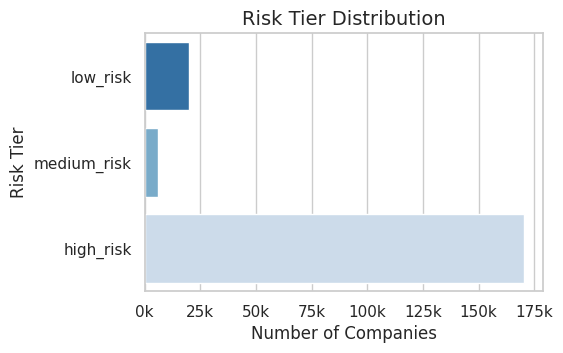

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(y='risk_tier_label', data=df, palette="Blues_r")

plt.title("Risk Tier Distribution", fontsize=14)
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Risk Tier", fontsize=12)

# make x-axis labels shorter
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()

Most companies fall into the high-risk group, while only a small number are medium or low risk. This shows that most startups in the dataset appear financially vulnerable or less established based on our risk scoring

# Company Status Distribution

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\1978677077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


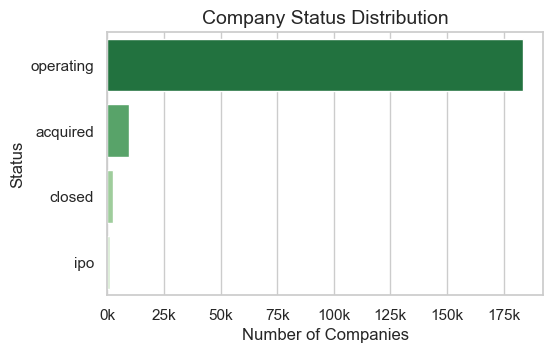

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(
    y='status',
    data=df,
    palette="Greens_r"
)

plt.title("Company Status Distribution", fontsize=14)
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Status", fontsize=12)

# shorten x-axis numbers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()


Most companies are still operating, while only a few have been acquired, gone public, or closed. This means most startups in the dataset are still active and haven’t yet reached a final outcome.

# Funding Distribution

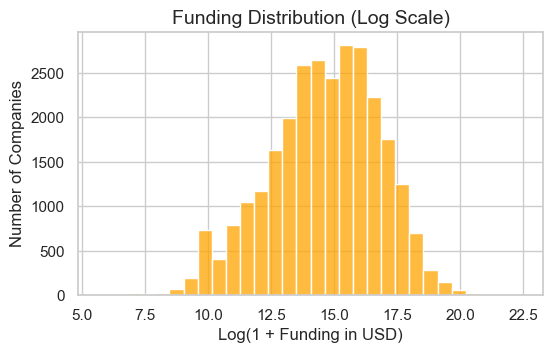

In [ ]:
# convert to numeric and remove missing/zero
funding_data = pd.to_numeric(df['funding_total_usd'], errors='coerce')
funding_data = funding_data[funding_data > 0]

# plot histogram
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(funding_data), bins=30, color='orange')

plt.title("Funding Distribution (Log Scale)", fontsize=14)
plt.xlabel("Log(1 + Funding in USD)", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

Most companies in our dataset raised a medium amount of funding. Only a small number raised very large amounts, which shows that big funding rounds are rare.

# Company Age Distribution

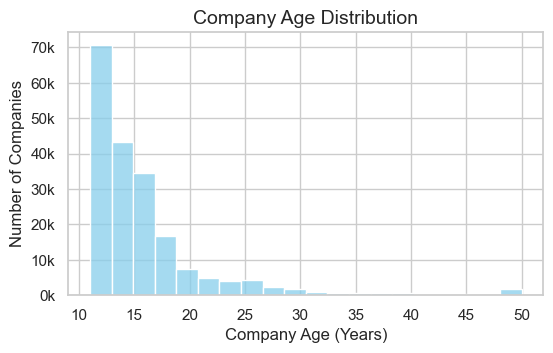

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['company_age_years'].dropna(), bins=20, color='skyblue')

plt.title("Company Age Distribution", fontsize=14)
plt.xlabel("Company Age (Years)", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)

# Shorten the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()

Most companies are relatively young. The age distribution is right-skewed, meaning many younger firms and fewer older ones

#Funding by Risk Tier

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\2507990486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


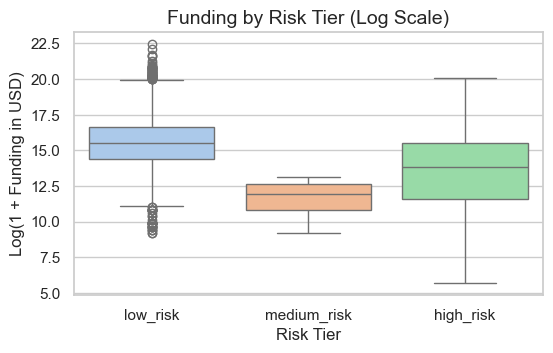

In [ ]:
# keep only rows with funding > 0 so the log works
funding_risk = df[df['funding_total_usd'] > 0]

plt.figure(figsize=(6,4))
sns.boxplot(
    x='risk_tier_label',
    y=np.log1p(funding_risk['funding_total_usd']),
    data=funding_risk,
    palette="pastel"
)

plt.title("Funding by Risk Tier (Log Scale)", fontsize=14)
plt.xlabel("Risk Tier", fontsize=12)
plt.ylabel("Log(1 + Funding in USD)", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

This chart shows that low-risk companies usually have higher funding, while medium-risk ones have much less. High-risk companies vary more in how much money they have, with some getting very little and a few raising large amounts. Overall, this suggests that companies with more funding tend to be safer, while those with little money are more likely to be risky.

# Risk by Company Age Group

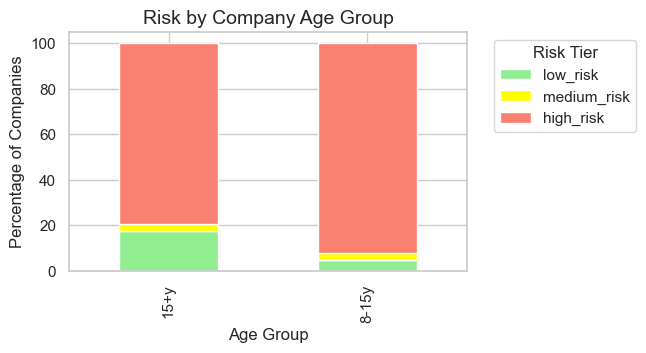

In [ ]:
age_risk = pd.crosstab(df['age_group'], df['risk_tier_label'], normalize='index') * 100

# make stacked bar chart
age_risk.plot(kind='bar', stacked=True, figsize=(7,4),
              color=['lightgreen', 'yellow', 'salmon'])

plt.title("Risk by Company Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage of Companies", fontsize=12)

plt.legend(title="Risk Tier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=2.0)
plt.show()


Both the 8–15 year and 15+ year companies are mostly high risk, but the 15+ group has a bit more low-risk firms than the 8–15 group. This suggests that while many older companies still face high risk, a few long-standing ones have become more stable over time.

# Top 10 Industries by High-Risk Share

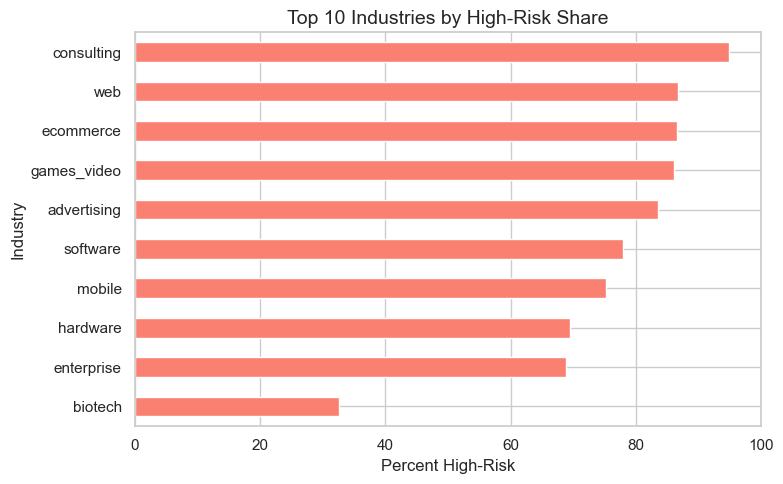

In [ ]:
# Top 10 industries
top_industries = (
    df.loc[df['category_code']!='other','category_code']
      .value_counts().head(10).index
)

# Calculate % of high-risk firms per industry
pct_high = (
    pd.crosstab(df['category_code'], df['risk_tier_label'], normalize='index') * 100
).loc[top_industries]['high_risk'].sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,5))
pct_high.plot(kind='barh', color='salmon')

plt.title('Top 10 Industries by High-Risk Share', fontsize=14)
plt.xlabel('Percent High-Risk')
plt.ylabel('Industry')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

Among the industries in our data, these ten have the highest share of high-risk companies.

# Top 10 High-Risk States

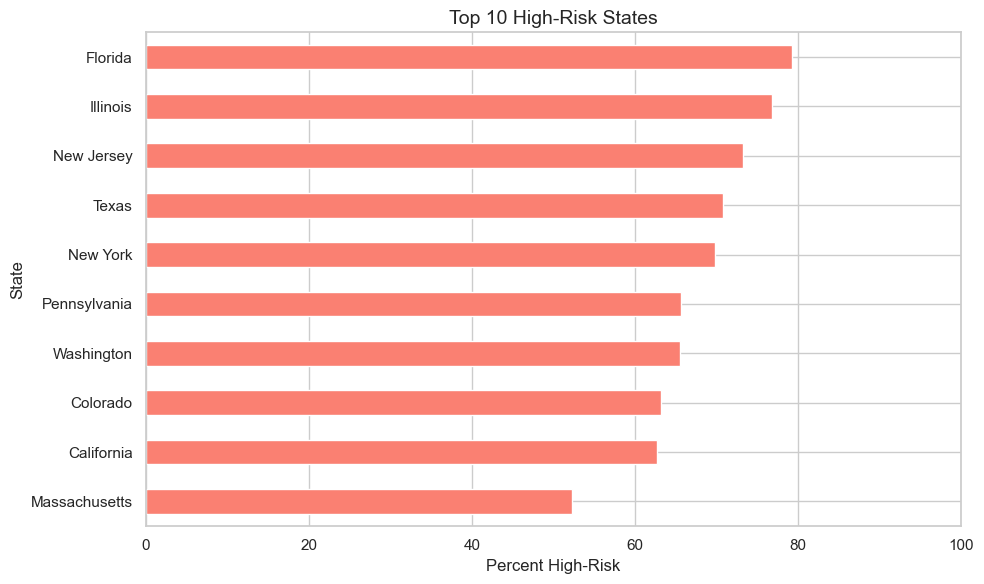

In [ ]:
# keep only usa companies
df_us = df[df['country_code'] == 'usa'].copy()

# make state codes lowercase
df_us['state_code'] = df_us['state_code'].str.lower()

# convert state codes to names
state_map = {
    'fl': 'Florida',
    'il': 'Illinois',
    'nj': 'New Jersey',
    'tx': 'Texas',
    'ny': 'New York',
    'pa': 'Pennsylvania',
    'wa': 'Washington',
    'co': 'Colorado',
    'ca': 'California',
    'ma': 'Massachusetts'
}

df_us['state_label'] = df_us['state_code'].map(state_map).fillna(df_us['state_code'])

# top 10 states
top_states = df_us['state_label'].value_counts().head(10).index

#  % high-risk per top 10
pct_high_state = (
    pd.crosstab(df_us['state_label'], df_us['risk_tier_label'], normalize='index') * 100
).loc[top_states, 'high_risk'].sort_values(ascending=True)


plt.figure(figsize=(10,6))
pct_high_state.plot(kind='barh', color='salmon')

plt.title('Top 10 High-Risk States', fontsize=14)
plt.xlabel('Percent High-Risk'); plt.ylabel('State')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

Within the U.S. sample, these ten states have the highest share of high-risk companies.

# 1. Under-Capitalized Population Analysis

## Step 1: Identify Under-Capitalized Companies

```
ALGORITHM: Under-Capitalized Population Identification
1. Calculate 2% funding threshold from dataset:
   - funding_threshold_2pct = df['funding_total_usd'].quantile(0.02)
   - Display threshold value for validation

2. Create under-capitalized flag:
   - under_capitalized = (funding_total_usd <= threshold) OR (funding_total_usd.isna()) OR (funding_total_usd == 0)
   - Count total under-cap companies and calculate percentage
   - Validate against project requirement (~2% of VC funding)

3. Add under-cap analysis to existing visualizations:
   - Overlay under-cap percentages on current charts
   - Create under-cap vs well-funded comparison plots
   - Document population characteristics for ML preparation

EXPECTED OUTPUT:
- under_capitalized column added to analysis dataset
- Population count: "X,XXX companies (XX.X%)"
- Enhanced visualizations showing under-cap focus
- Exported under-cap analysis data for ML consumption
```

In [ ]:
# Calculate 2% funding threshold
funding_threshold_2pct = df['funding_total_usd'].quantile(0.02)
print(f"2% Funding Threshold: ${funding_threshold_2pct:,.2f}")

# Create under-capitalized flag
df['under_capitalized'] = (
    (df['funding_total_usd'] <= funding_threshold_2pct) |
    (df['funding_total_usd'].isna()) |
    (df['funding_total_usd'] == 0)
)

# Count under-capitalized companies
under_cap_count = df['under_capitalized'].sum()
under_cap_percentage = (under_cap_count / len(df)) * 100

print(f"Under-capitalized companies: {under_cap_count:,} ({under_cap_percentage:.1f}%)")

# Breakdown of under-capitalized reasons
zero_funding = (df['funding_total_usd'] == 0).sum()
missing_funding = df['funding_total_usd'].isna().sum()
below_threshold = (df['funding_total_usd'] <= funding_threshold_2pct).sum() - zero_funding

print(f"  - Zero funding: {zero_funding:,}")
print(f"  - Missing funding data: {missing_funding:,}")
print(f"  - Below 2% threshold: {below_threshold:,}")

2% Funding Threshold: $19,616.00
Under-capitalized companies: 169,216 (86.1%)
  - Zero funding: 0
  - Missing funding data: 168,657
  - Below 2% threshold: 559


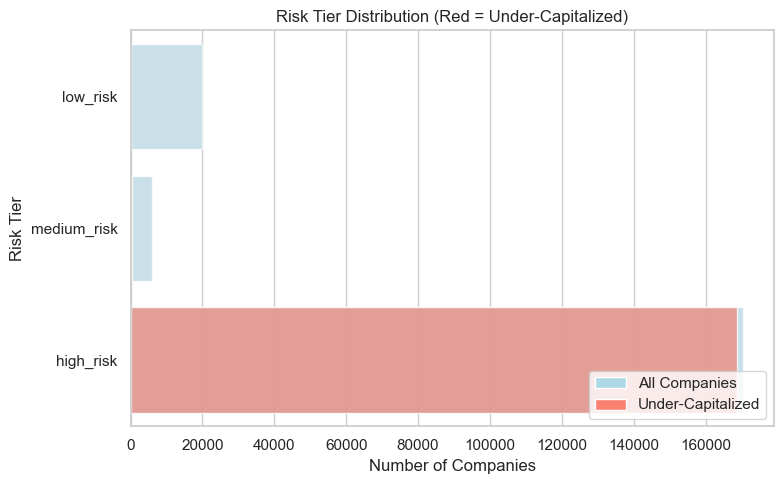

In [ ]:
# Enhanced Risk Tier Distribution with under-capitalized overlay
plt.figure(figsize=(8,5))

# Plot overall risk distribution
ax = sns.countplot(y='risk_tier_label', data=df, color='lightblue', alpha=0.7)

# Overlay under-capitalized companies
under_cap_data = df[df['under_capitalized'] == True]
sns.countplot(y='risk_tier_label', data=under_cap_data, color='salmon', alpha=0.8, ax=ax)

plt.title("Risk Tier Distribution (Red = Under-Capitalized)")
plt.xlabel("Number of Companies")
plt.ylabel("Risk Tier")

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', label='All Companies'),
    Patch(facecolor='salmon', label='Under-Capitalized')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
# Under-capitalized vs Well-funded comparison
comparison_data = df.groupby('under_capitalized').agg({
    'failure_risk': 'mean',
    'company_age_years': 'mean',
    'status': lambda x: (x == 'operating').mean()  # % still operating
}).round(3)

comparison_data.index = ['Well-Funded', 'Under-Capitalized']
print("Comparison: Under-Capitalized vs Well-Funded Companies")
print(comparison_data)

Comparison: Under-Capitalized vs Well-Funded Companies
                   failure_risk  company_age_years  status
Well-Funded               0.060             17.522   0.837
Under-Capitalized         0.998             15.423   0.949


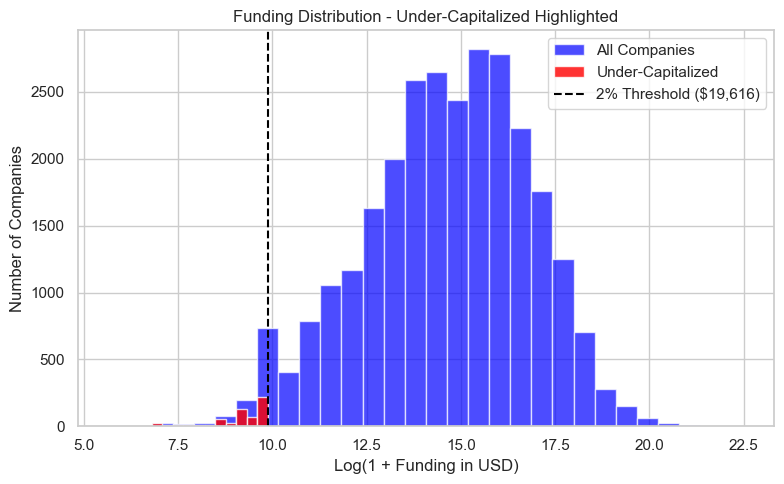

In [ ]:
# Funding distribution highlighting under-capitalized
plt.figure(figsize=(8,5))

# Plot funding distribution
funding_data = df[df['funding_total_usd'] > 0]['funding_total_usd']
under_cap_funding = df[(df['under_capitalized'] == True) & (df['funding_total_usd'] > 0)]['funding_total_usd']

plt.hist(np.log1p(funding_data), bins=30, alpha=0.7, label='All Companies', color='blue')
plt.hist(np.log1p(under_cap_funding), bins=15, alpha=0.8, label='Under-Capitalized', color='red')

plt.axvline(np.log1p(funding_threshold_2pct), color='black', linestyle='--', label=f'2% Threshold (${funding_threshold_2pct:,.0f})')

plt.title("Funding Distribution - Under-Capitalized Highlighted")
plt.xlabel("Log(1 + Funding in USD)")
plt.ylabel("Number of Companies")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Under-capitalized by funding stage
if 'funding_stage' in df.columns:
    under_cap_by_stage = pd.crosstab(df['funding_stage'], df['under_capitalized'], normalize='index') * 100
    print("Under-Capitalized % by Funding Stage:")
    print(under_cap_by_stage[True].round(1))

Under-Capitalized % by Funding Stage:
funding_stage
Pre-seed            5.5
Seed                0.0
Early               0.0
Growth              0.0
Late               99.7
Exit (IPO)         57.8
Exit (Acquired)    75.3
Closed             36.1
Name: True, dtype: float64


## Step 2: Geographic Under-Cap Analysis Preparation

```
ALGORITHM: Geographic Data Preparation for Future Heatmap Development
1. Create state-level under-cap aggregations:
   - Group by state_code → count under_cap companies per state
   - Calculate under_cap_density = under_cap_count / total_companies_per_state
   - Calculate state-level success rates for under_cap population
   - Prepare geographic summary statistics

2. Export geographic analysis data:
   - Save state_level_undercap_data.csv for future heatmap consumption
   - Include columns: state, total_companies, undercap_count, undercap_density, success_rate
   - Document geographic patterns for feature engineering

EXPECTED OUTPUT:
- State-level under-cap aggregation dataset exported
- Geographic pattern documentation for ML preparation
- Foundation data for future Month 3 heatmap development
- Geographic opportunity identification framework
```

In [ ]:
# Filter to USA companies for geographic analysis
df_usa = df[df['country_code'] == 'usa'].copy()

# Create state-level aggregations
state_analysis = df_usa.groupby('state_code').agg(
    total_companies=('state_code', 'count'),
    undercap_count=('under_capitalized', 'sum'),
    success_count=('status', lambda x: (x.isin(['ipo', 'acquired'])).sum())
).reset_index()

# Calculate derived metrics
state_analysis['undercap_density'] = state_analysis['undercap_count'] / state_analysis['total_companies']
state_analysis['success_rate'] = state_analysis['success_count'] / state_analysis['total_companies']
state_analysis['undercap_success_rate'] = state_analysis['success_count'] / state_analysis['undercap_count']

# Handle division by zero
state_analysis['undercap_success_rate'] = state_analysis['undercap_success_rate'].replace([np.inf, -np.inf], 0)

# Sort by undercap density
state_analysis = state_analysis.sort_values('undercap_density', ascending=False)

print("Top states by under-capitalized density:")
print(state_analysis.head(10))

# Export for future heatmap development
state_analysis.to_csv('../processed_data/state_level_undercap_data.csv', index=False)
print(f"Exported state-level data: {len(state_analysis)} states")

# Document geographic patterns
high_undercap_states = state_analysis[state_analysis['undercap_density'] > 0.3]
print(f"\nStates with >30% under-capitalized density: {len(high_undercap_states)}")

# Summary statistics
print(f"\nGeographic pattern summary:")
print(f"Average under-cap density across states: {state_analysis['undercap_density'].mean():.3f}")
print(f"State with highest under-cap density: {state_analysis.iloc[0]['state_code']} ({state_analysis.iloc[0]['undercap_density']:.3f})")
print(f"State with lowest under-cap density: {state_analysis.iloc[-1]['state_code']} ({state_analysis.iloc[-1]['undercap_density']:.3f})")

Top states by under-capitalized density:
   state_code  total_companies  undercap_count  success_count  \
8          de              175             141              6   
9          fl             2149            1684            158   
3          az              755             580             70   
28         nd               30              23              3   
44    unknown              975             745            122   
33         nv              398             302             27   
14         il             1736            1316            182   
7          dc              363             273             22   
40         sc              193             145             13   
22         mi              630             467             44   

    undercap_density  success_rate  undercap_success_rate  
8           0.805714      0.034286               0.042553  
9           0.783620      0.073523               0.093824  
3           0.768212      0.092715               0.120690  
28 

# 2. Industry Sector Analysis & Data Preparation

## Step 1: Industry Under-Cap Opportunity Analysis

```
ALGORITHM: Industry-Level Under-Capitalized Analysis
1. Calculate industry under-cap concentrations:
   - Group by category_code → count under_cap companies per industry
   - Calculate industry_undercap_rate = under_cap_count / total_companies_per_industry
   - Rank industries by under-cap opportunity size
   - Identify high-potential sectors for investment focus

2. Industry success pattern analysis:
   - Calculate success rates by industry for under_cap companies
   - Compare under_cap vs well-funded success rates per industry
   - Identify industries with favorable under_cap success patterns
   - Document industry opportunity insights

3. Export industry analysis data:
   - Save industry_undercap_analysis.csv for ML consumption
   - Include: industry, total_companies, undercap_count, undercap_rate, success_rate
   - Prepare industry feature data for clustering analysis

EXPECTED OUTPUT:
- Industry-level under-cap opportunity ranking
- Success pattern analysis by sector  
- Exported industry analysis dataset for ML preparation
- Investment opportunity documentation by industry
```

Top industries by under-capitalized opportunity:
       category_code  total_companies  undercap_rate  undercap_success_rate  \
35     semiconductor              696       0.382184               0.447368   
3            biotech             4430       0.302935               0.287630   
34          security             1171       0.685739               0.108344   
14          hardware             2951       0.676042               0.106767   
31  public_relations             2846       0.876318               0.076584   
9         enterprise             4441       0.681153               0.089917   
37          software            17919       0.767063               0.077119   
25   network_hosting             2350       0.809787               0.069364   
41               web            15117       0.850169               0.055711   
19     manufacturing              679       0.519882               0.090652   

    opportunity_score  
35           0.170977  
3            0.087133  
34       

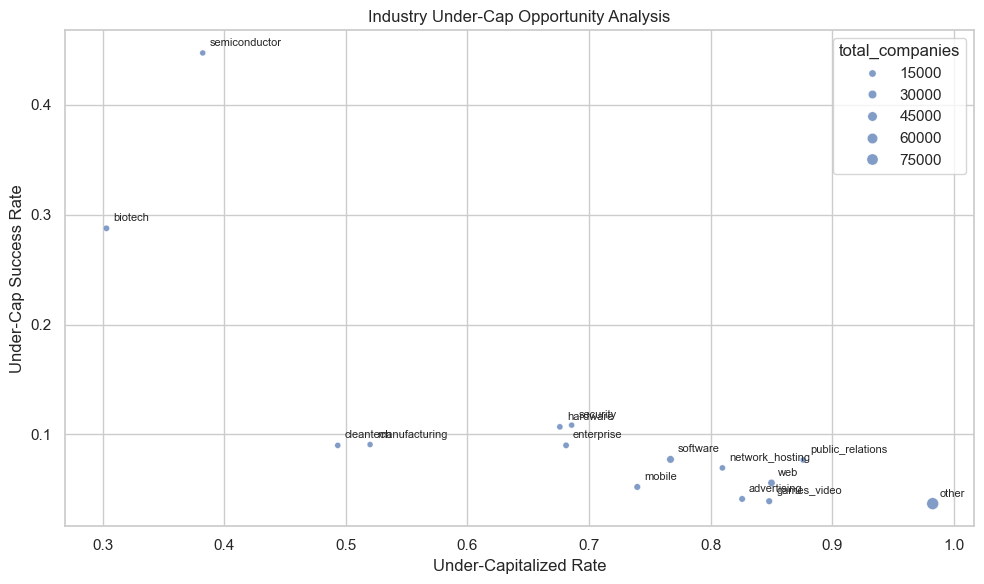

In [ ]:
# Calculate industry under-cap concentrations
industry_analysis = df.groupby('category_code').agg(
    total_companies=('category_code', 'count'),
    undercap_count=('under_capitalized', 'sum'),
    success_count=('status', lambda x: (x.isin(['ipo', 'acquired'])).sum()),
    avg_failure_risk=('failure_risk', 'mean')
).reset_index()

# Calculate derived metrics
industry_analysis['undercap_rate'] = industry_analysis['undercap_count'] / industry_analysis['total_companies']
industry_analysis['success_rate'] = industry_analysis['success_count'] / industry_analysis['total_companies']

# Calculate success rates specifically for under-cap companies
undercap_success = df[df['under_capitalized'] == True].groupby('category_code').agg(
    undercap_success_count=('status', lambda x: (x.isin(['ipo', 'acquired'])).sum())
).reset_index()

# Merge under-cap success rates
industry_analysis = industry_analysis.merge(undercap_success, on='category_code', how='left')
industry_analysis['undercap_success_rate'] = industry_analysis['undercap_success_count'] / industry_analysis['undercap_count']

# Handle division by zero
industry_analysis['undercap_success_rate'] = industry_analysis['undercap_success_rate'].replace([np.inf, -np.inf], 0).fillna(0)

# Rank industries by opportunity (high under-cap rate + decent success rate)
industry_analysis['opportunity_score'] = industry_analysis['undercap_rate'] * industry_analysis['undercap_success_rate']

# Sort by opportunity score
industry_analysis = industry_analysis.sort_values('opportunity_score', ascending=False)

print("Top industries by under-capitalized opportunity:")
top_industries = industry_analysis.head(10)
print(top_industries[['category_code', 'total_companies', 'undercap_rate', 'undercap_success_rate', 'opportunity_score']])

# Export industry analysis data
industry_analysis.to_csv('../processed_data/industry_undercap_analysis.csv', index=False)
print(f"\nExported industry analysis data: {len(industry_analysis)} industries")

# Industry success pattern analysis
print(f"\nIndustry success pattern summary:")
print(f"Average under-cap rate across industries: {industry_analysis['undercap_rate'].mean():.3f}")
print(f"Average under-cap success rate: {industry_analysis['undercap_success_rate'].mean():.3f}")

# Identify high-potential sectors
high_opportunity = industry_analysis[
    (industry_analysis['undercap_rate'] > 0.3) &
    (industry_analysis['undercap_success_rate'] > 0.1)
]
print(f"High-opportunity industries (>30% under-cap rate, >10% success): {len(high_opportunity)}")

# Visualize top industries by opportunity
plt.figure(figsize=(10, 6))
top_plot_data = industry_analysis.head(15)
sns.scatterplot(data=top_plot_data, x='undercap_rate', y='undercap_success_rate', size='total_companies', alpha=0.7)
plt.title('Industry Under-Cap Opportunity Analysis')
plt.xlabel('Under-Capitalized Rate')
plt.ylabel('Under-Cap Success Rate')

# Add industry labels
for i, row in top_plot_data.iterrows():
    plt.annotate(row['category_code'], (row['undercap_rate'], row['undercap_success_rate']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

## Step 2: Feature Correlation Analysis for ML Preparation

```
ALGORITHM: Feature Correlation Analysis for ML Development
1. Create correlation matrix for risk prediction features:
   - Select key features from feature engineering dataset
   - Calculate correlation with failure_risk target variable
   - Identify top predictive features for ML model development
   - Document multicollinearity issues for feature selection

2. Export ML-ready correlation data:
   - Save feature_correlations.csv with correlation rankings
   - Create feature_importance_ranking.csv for model building
   - Document feature selection recommendations
   - Prepare clustering feature sets

EXPECTED OUTPUT:
- Feature correlation matrix with target variable
- ML-ready correlation datasets exported
- Feature selection guidance for models
- Clustering feature preparation for risk personas
```

Analyzing 81 features for ML correlation...
Top 20 features correlated with failure risk:
                     feature  correlation_with_risk  abs_correlation
0                  risk_tier               0.968730         0.968730
1                has_funding              -0.960477         0.960477
2            stage_risk_mean               0.939940         0.939940
3      risk_vs_country_peers               0.905835         0.905835
4     risk_vs_industry_peers               0.899575         0.899575
5          funding_frequency              -0.854133         0.854133
6             funding_rounds              -0.748466         0.748466
7          geo_industry_risk               0.492037         0.492037
8          achievement_score              -0.467986         0.467986
9         industry_risk_mean               0.436767         0.436767
10     funding_duration_days              -0.433460         0.433460
11         country_risk_mean               0.423630         0.423630
12     experi

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\278344941.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='correlation_with_risk', y='feature', palette=colors)


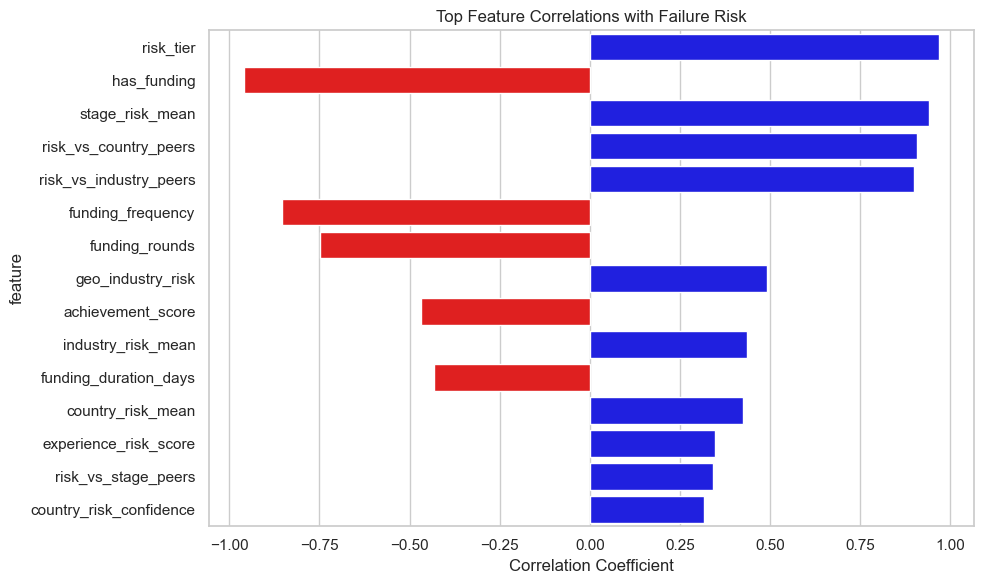

In [ ]:
# Select numeric features for correlation analysis
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove non-predictive columns
exclude_features = ['failure_risk']  # Keep target for correlation
ml_features = [f for f in numeric_features if f not in exclude_features]

print(f"Analyzing {len(ml_features)} features for ML correlation...")

# Calculate correlation with failure_risk target
correlation_with_target = df[ml_features + ['failure_risk']].corr()['failure_risk'].drop('failure_risk')
correlation_with_target = correlation_with_target.sort_values(key=abs, ascending=False)

# Create feature correlation dataset
feature_correlations = pd.DataFrame({
    'feature': correlation_with_target.index,
    'correlation_with_risk': correlation_with_target.values,
    'abs_correlation': abs(correlation_with_target.values)
}).sort_values('abs_correlation', ascending=False)

print("Top 20 features correlated with failure risk:")
print(feature_correlations.head(20))

# Export correlation data
feature_correlations.to_csv('../processed_data/feature_correlations.csv', index=False)
print(f"\nExported feature correlations: {len(feature_correlations)} features")

# Create feature importance ranking
feature_importance = feature_correlations[['feature', 'abs_correlation']].copy()
feature_importance['importance_rank'] = range(1, len(feature_importance) + 1)
feature_importance.to_csv('../processed_data/feature_importance_ranking.csv', index=False)

# Multicollinearity analysis
correlation_matrix = df[ml_features].corr().abs()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.8:
            high_corr_pairs.append({
                'feature_1': correlation_matrix.columns[i],
                'feature_2': correlation_matrix.columns[j],
                'correlation': correlation_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', ascending=False)
print(f"\nHighly correlated feature pairs (>0.8): {len(high_corr_pairs)}")

# Feature selection recommendations
strong_predictors = feature_correlations[feature_correlations['abs_correlation'] > 0.1]
weak_predictors = feature_correlations[feature_correlations['abs_correlation'] < 0.05]

print(f"\nFeature selection summary:")
print(f"Strong predictors (|corr| > 0.1): {len(strong_predictors)} features")
print(f"Weak predictors (|corr| < 0.05): {len(weak_predictors)} features")

# Prepare clustering feature sets
clustering_features = strong_predictors.head(15)['feature'].tolist()
print(f"\nRecommended clustering features ({len(clustering_features)}):")
print(clustering_features)

# Visualize top feature correlations
plt.figure(figsize=(10, 6))
top_features = feature_correlations.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_features['correlation_with_risk']]
sns.barplot(data=top_features, x='correlation_with_risk', y='feature', palette=colors)
plt.title('Top Feature Correlations with Failure Risk')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# 3. Risk Analysis Enhancement & ML Preparation

## Step 1: Enhanced Risk Distribution Analysis

```
ALGORITHM: Risk Tier Analysis with Under-Capitalized Focus
1. Enhance existing risk visualizations:
   - Add under-cap overlay to risk tier distribution charts
   - Calculate risk distribution within under-cap population
   - Compare risk patterns: under-cap vs well-funded companies
   - Document risk pattern differences for ML feature engineering

2. Create risk-geographic cross-analysis:
   - Calculate risk distribution by state for under-cap companies
   - Identify geographic risk pattern variations
   - Prepare state-risk analysis bias detection
   - Export geographic-risk datasets for ML preparation

3. Export enhanced risk analysis data:
   - Save risk_analysis_enhanced.csv with under-cap focus
   - Include geographic risk patterns for bias analysis
   - Prepare risk feature data for ML models

EXPECTED OUTPUT:
- Enhanced risk visualizations with under-cap focus
- Geographic risk pattern analysis
- Exported risk datasets for ML development
- Bias detection preparation data
```

<Figure size 1000x600 with 0 Axes>

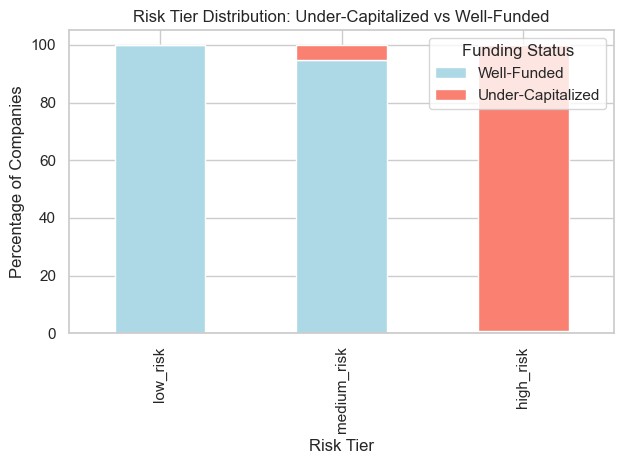

Risk Distribution Comparison:

Under-Capitalized Companies:
risk_tier_label
high_risk      99.802028
medium_risk     0.190289
low_risk        0.007682
Name: proportion, dtype: float64

Well-Funded Companies:
risk_tier_label
low_risk       73.087062
medium_risk    20.872080
high_risk       6.040858
Name: proportion, dtype: float64

Top states by high-risk under-cap companies:
   state_code  total_undercap  high_risk_percentage  avg_failure_risk
0          ak              12                 100.0               1.0
1          al             125                 100.0               1.0
2          ar              61                 100.0               1.0
6          ct             322                 100.0               1.0
16         ks             124                 100.0               1.0
8          de             147                 100.0               1.0
11         hi              52                 100.0               1.0
13         id              66                 100.0           

C:\Users\emily\AppData\Local\Temp\ipykernel_19964\2722156715.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enhanced_risk_data = df.groupby(['risk_tier_label', 'under_capitalized']).agg(


High-risk under-cap rate: 99.0%
Low-risk under-cap rate: 0.1%

Risk pattern differences:
                  failure_risk        company_age_years funding_total_usd
                          mean    std              mean              mean
under_capitalized                                                        
False                    0.060  0.238            17.522      1.512006e+07
True                     0.998  0.044            15.423      1.153010e+04


In [ ]:
# Enhanced risk tier distribution with under-cap focus
plt.figure(figsize=(10, 6))

# Calculate percentages for stacked bar chart
risk_undercap = pd.crosstab(df['risk_tier_label'], df['under_capitalized'], normalize='index') * 100
risk_undercap.columns = ['Well-Funded', 'Under-Capitalized']

# Create stacked bar chart
risk_undercap.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Risk Tier Distribution: Under-Capitalized vs Well-Funded')
plt.xlabel('Risk Tier')
plt.ylabel('Percentage of Companies')
plt.legend(title='Funding Status')
plt.tight_layout()
plt.show()

# Risk distribution within under-cap population
under_cap_risk = df[df['under_capitalized'] == True]['risk_tier_label'].value_counts(normalize=True) * 100
well_funded_risk = df[df['under_capitalized'] == False]['risk_tier_label'].value_counts(normalize=True) * 100

print("Risk Distribution Comparison:")
print("\nUnder-Capitalized Companies:")
print(under_cap_risk)
print("\nWell-Funded Companies:")
print(well_funded_risk)

# Risk-geographic cross-analysis for under-cap companies
if 'state_code' in df.columns:
    state_risk_analysis = df[df['under_capitalized'] == True].groupby('state_code').agg(
        total_undercap=('state_code', 'count'),
        high_risk_percentage=('risk_tier_label', lambda x: (x == 'high_risk').mean() * 100),
        avg_failure_risk=('failure_risk', 'mean')
    ).reset_index()

    state_risk_analysis = state_risk_analysis.sort_values('high_risk_percentage', ascending=False)

    print(f"\nTop states by high-risk under-cap companies:")
    print(state_risk_analysis.head(10))

# Create enhanced risk analysis dataset
enhanced_risk_data = df.groupby(['risk_tier_label', 'under_capitalized']).agg(
    count=('risk_tier_label', 'count'),
    avg_failure_risk=('failure_risk', 'mean'),
    success_rate=('status', lambda x: (x.isin(['ipo', 'acquired'])).mean() * 100),
    avg_company_age=('company_age_years', 'mean')
).reset_index()

# Add geographic risk patterns if state data available
if 'state_code' in df.columns:
    state_risk_patterns = df.groupby('state_code').agg(
        state_risk_bias=('failure_risk', 'mean'),
        state_undercap_rate=('under_capitalized', 'mean')
    ).reset_index()

    enhanced_risk_data = enhanced_risk_data.merge(
        state_risk_patterns, how='cross'
    )

# Export enhanced risk analysis data
enhanced_risk_data.to_csv('../processed_data/risk_analysis_enhanced.csv', index=False)
print(f"\nExported enhanced risk analysis: {len(enhanced_risk_data)} records")

# Bias detection preparation
print(f"\nBias detection summary:")
print(f"Overall under-cap rate: {df['under_capitalized'].mean()*100:.1f}%")
print(f"High-risk under-cap rate: {(df[df['risk_tier_label'] == 'high_risk']['under_capitalized'].mean())*100:.1f}%")
print(f"Low-risk under-cap rate: {(df[df['risk_tier_label'] == 'low_risk']['under_capitalized'].mean())*100:.1f}%")

# Risk pattern differences for ML features
risk_patterns = df.groupby('under_capitalized').agg({
    'failure_risk': ['mean', 'std'],
    'company_age_years': 'mean',
    'funding_total_usd': 'mean'
}).round(3)

print(f"\nRisk pattern differences:")
print(risk_patterns)

## Step 2: Clustering Data Preparation

```
ALGORITHM: Risk Profile Clustering Data Preparation
1. Prepare clustering-ready feature sets:
   - Select normalized features for risk profile clustering
   - Create standardized feature matrix for unsupervised learning
   - Document feature selection rationale for clustering
   - Validate feature completeness and quality

2. Export clustering preparation data:
   - Save clustering_features_ready.csv for ML phase
   - Include feature correlation matrix for cluster validation
   - Document clustering methodology recommendations
   - Prepare cluster validation datasets

EXPECTED OUTPUT:
- Clustering-ready feature dataset exported
- Feature selection documentation for ML team
- Clustering methodology guidance
- Validation dataset preparation
```

In [ ]:
# Select features for clustering based on correlation analysis
clustering_features = [
    'failure_risk', 'company_age_years', 'funding_total_usd',
    'under_capitalized', 'employee_count', 'investor_count'
]

# Add any additional relevant features from correlation analysis
additional_features = [
    'has_email', 'has_phone', 'has_description',
    'funding_rounds', 'avg_funding_per_round'
]

# Combine features and check availability
available_features = [f for f in clustering_features + additional_features if f in df.columns]
print(f"Selected {len(available_features)} features for clustering:")

# Create clustering-ready dataset
clustering_data = df[available_features].copy()

# Handle missing values
missing_before = clustering_data.isnull().sum()
print(f"\nMissing values before processing:")
for feature, missing in missing_before[missing_before > 0].items():
    print(f"  {feature}: {missing} missing ({missing/len(clustering_data)*100:.1f}%)")

# Fill missing values with median for numeric, mode for categorical
for column in clustering_data.columns:
    if clustering_data[column].dtype in ['float64', 'int64']:
        clustering_data[column] = clustering_data[column].fillna(clustering_data[column].median())
    else:
        clustering_data[column] = clustering_data[column].fillna(clustering_data[column].mode()[0])

print(f"\nMissing values after processing: {clustering_data.isnull().sum().sum()}")

# Feature standardization preparation
from sklearn.preprocessing import StandardScaler

# Select numeric features for standardization
numeric_features = clustering_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"\nNumeric features for standardization: {len(numeric_features)}")

# Create standardized version
scaler = StandardScaler()
clustering_data_standardized = clustering_data.copy()
clustering_data_standardized[numeric_features] = scaler.fit_transform(clustering_data[numeric_features])

# Export clustering datasets
clustering_data.to_csv('../processed_data/clustering_features_ready.csv', index=False)
clustering_data_standardized.to_csv('../processed_data/clustering_features_standardized.csv', index=False)

print(f"\nExported clustering datasets:")
print(f"  - Original features: {len(clustering_data)} rows, {len(clustering_data.columns)} columns")
print(f"  - Standardized features: {len(clustering_data_standardized)} rows, {len(clustering_data_standardized.columns)} columns")

# Feature correlation matrix for cluster validation
correlation_matrix = clustering_data.corr()
print(f"\nFeature correlation matrix shape: {correlation_matrix.shape}")

# Export correlation matrix
correlation_matrix.to_csv('../processed_data/clustering_feature_correlations.csv')
print("Exported feature correlation matrix")

# Clustering methodology documentation
print(f"\nClustering Methodology Recommendations:")
print(f"1. Feature set: {len(available_features)} features selected")
print(f"2. Data points: {len(clustering_data)} companies")
print(f"3. Recommended algorithms: K-means, DBSCAN, Gaussian Mixture Models")
print(f"4. Validation metrics: Silhouette score, Calinski-Harabasz index")
print(f"5. Expected clusters: 3-5 risk profile segments")

# Prepare cluster validation datasets
validation_features = ['failure_risk', 'under_capitalized', 'company_age_years']
validation_data = df[validation_features].copy()
validation_data.to_csv('../processed_data/cluster_validation_dataset.csv', index=False)

print(f"\nCluster validation dataset prepared: {len(validation_data)} records")
print(f"Validation features: {validation_features}")

# Feature selection rationale
print(f"\nFeature Selection Rationale:")
for feature in available_features:
    feature_type = 'numeric' if feature in numeric_features else 'categorical'
    print(f"  - {feature}: {feature_type} feature for risk profiling")

Selected 6 features for clustering:

Missing values before processing:
  funding_total_usd: 168657 missing (85.8%)

Missing values after processing: 0

Numeric features for standardization: 5

Exported clustering datasets:
  - Original features: 196530 rows, 6 columns
  - Standardized features: 196530 rows, 6 columns

Feature correlation matrix shape: (6, 6)
Exported feature correlation matrix

Clustering Methodology Recommendations:
1. Feature set: 6 features selected
2. Data points: 196530 companies
3. Recommended algorithms: K-means, DBSCAN, Gaussian Mixture Models
4. Validation metrics: Silhouette score, Calinski-Harabasz index
5. Expected clusters: 3-5 risk profile segments

Cluster validation dataset prepared: 196530 records
Validation features: ['failure_risk', 'under_capitalized', 'company_age_years']

Feature Selection Rationale:
  - failure_risk: numeric feature for risk profiling
  - company_age_years: numeric feature for risk profiling
  - funding_total_usd: numeric feature

# 4. Business Intelligence Data Export for




## Step 1: Investment Analysis Data Preparation

```
ALGORITHM: Investment Opportunity Data Export
1. Create investment candidate dataset:
   - Filter companies meeting basic investment criteria
   - Calculate investment attractiveness scores using current features
   - Rank companies by under-cap investment potential
   - Document investment screening methodology

2. Prepare sector opportunity analysis:
   - Export industry-level investment metrics
   - Include under-cap concentration by sector
   - Calculate sector growth indicators from temporal data
   - Prepare sector recommendation framework

3. Export investment analysis datasets:
   - Save investment_candidates_analysis.csv for consumption
   - Include sector_opportunity_matrix.csv
   - Document investment methodology for ML enhancement

EXPECTED OUTPUT:
- Investment candidate dataset exported
- Sector opportunity analysis prepared
- Investment methodology documentation
- ML enhancement framework
```

In [3]:
# basic invest eligibility
df['eligible_investment'] = (
    (df['status'] == 'operating') &
    (~df['failure_risk'].isna()) &
    (~df['risk_tier_label'].isna())
)

# candidate view
investment_candidates = df[df['eligible_investment']].copy()

# quick check
print("candidates:", len(investment_candidates))
print("under-cap:", int(investment_candidates['under_capitalized'].sum()))
print("under-cap %:", round(100*investment_candidates['under_capitalized'].mean(), 2))

candidates: 183419
under-cap: 160553
under-cap %: 87.53


In [4]:
# investment score
investment_candidates['investment_score'] = (
    (1 - investment_candidates['failure_risk']) * 0.6 +
    (investment_candidates['funding_total_usd'].fillna(0) / investment_candidates['funding_total_usd'].max()) * 0.3 +
    (~investment_candidates['under_capitalized']).astype(int) * 0.1)

# check score range
print("min:", round(investment_candidates['investment_score'].min(), 3))
print("max:", round(investment_candidates['investment_score'].max(), 3))
print("avg:", round(investment_candidates['investment_score'].mean(), 3))

min: 0.0
max: 1.0
avg: 0.089


In [5]:
# rank by score within under-cap group
investment_candidates['rank_under_cap'] = (
    investment_candidates[investment_candidates['under_capitalized']]
    ['investment_score']
    .rank(ascending=False, method='first'))

# rank by score overall
investment_candidates['rank_overall'] = (
    investment_candidates['investment_score']
    .rank(ascending=False, method='first'))

print("top under-cap:", int(investment_candidates['rank_under_cap'].min()))
print("top overall:", int(investment_candidates['rank_overall'].min()))

top under-cap: 1
top overall: 1


In [6]:
# Document investment screening methodology
print("--- Investment Screening Methodology Summary ---")
print(f"Total investment candidates: {len(investment_candidates)}")
print(f"Under-capitalized companies: {int(investment_candidates['under_capitalized'].sum())}")
print(f"Under-capitalized share: {round(100*investment_candidates['under_capitalized'].mean(), 2)}%")
print(f"Average investment_score: {round(investment_candidates['investment_score'].mean(), 3)}")
print(f"Highest investment_score: {round(investment_candidates['investment_score'].max(), 3)}")
print(f"Lowest investment_score: {round(investment_candidates['investment_score'].min(), 3)}")
print(f"Top under-cap rank: {int(investment_candidates['rank_under_cap'].min())}")
print(f"Top overall rank: {int(investment_candidates['rank_overall'].min())}")
print("Screening completed for eligible companies with valid risk data")
print("Next: Sector Opportunity Analysis")

--- Investment Screening Methodology Summary ---
Total investment candidates: 183419
Under-capitalized companies: 160553
Under-capitalized share: 87.53%
Average investment_score: 0.089
Highest investment_score: 1.0
Lowest investment_score: 0.0
Top under-cap rank: 1
Top overall rank: 1
Screening completed for eligible companies with valid risk data
Next: Sector Opportunity Analysis


In [7]:
# sector-level investment metrics
sector_analysis = investment_candidates.groupby('category_code').agg(
    total_companies=('category_code', 'size'),
    undercap_count=('under_capitalized', 'sum'),
    avg_investment_score=('investment_score', 'mean'),
    avg_failure_risk=('failure_risk', 'mean')
).reset_index()

# add under-cap rate
sector_analysis['undercap_rate'] = (
    sector_analysis['undercap_count'] / sector_analysis['total_companies'])

# sort by investment score
sector_analysis = sector_analysis.sort_values('avg_investment_score', ascending=False)

print(sector_analysis.head(10))

    category_code  total_companies  undercap_count  avg_investment_score  \
24       nanotech               67              14              0.556584   
3         biotech             3611             949              0.519252   
21      messaging              245              81              0.481613   
35  semiconductor              455             144              0.480335   
1       analytics              965             398              0.415770   
20        medical             1098             496              0.387732   
19  manufacturing              631             321              0.345862   
4       cleantech             1695             865              0.345052   
27      nonprofit              183              96              0.333062   
36         social             1230             781              0.262586   

    avg_failure_risk  undercap_rate  
24          0.208955       0.208955  
3           0.260039       0.262808  
21          0.310204       0.330612  
35         

In [8]:
# sector growth indicators
growth = (investment_candidates.groupby('category_code')
   .agg(
        avg_industry_growth_rate=('industry_growth_rate', 'mean'),
        avg_industry_growth_index=('industry_growth_index', 'mean'),
        avg_funding_velocity=('funding_velocity', 'mean')) .reset_index())

sector_analysis = sector_analysis.merge(growth, on='category_code', how='left')

print(sector_analysis.head(10))

   category_code  total_companies  undercap_count  avg_investment_score  \
0       nanotech               67              14              0.556584   
1        biotech             3611             949              0.519252   
2      messaging              245              81              0.481613   
3  semiconductor              455             144              0.480335   
4      analytics              965             398              0.415770   
5        medical             1098             496              0.387732   
6  manufacturing              631             321              0.345862   
7      cleantech             1695             865              0.345052   
8      nonprofit              183              96              0.333062   
9         social             1230             781              0.262586   

   avg_failure_risk  undercap_rate  avg_industry_growth_rate  \
0          0.208955       0.208955                  1.667078   
1          0.260039       0.262808            

In [9]:
# normalize growth rate to prevent large values from dominating
sector_analysis['avg_industry_growth_rate'] = (
    sector_analysis['avg_industry_growth_rate'] /
    sector_analysis['avg_industry_growth_rate'].max()
)

# make combined score using risk, investment, and growth
sector_analysis['sector_opportunity_score'] = (
    (1 - sector_analysis['avg_failure_risk']) +
    sector_analysis['avg_investment_score'] +
    sector_analysis['avg_industry_growth_rate']) / 3


# rank sectors
sector_analysis['sector_rank'] = sector_analysis['sector_opportunity_score'].rank(ascending=False, method='first')

# sort by score
sector_analysis = sector_analysis.sort_values('sector_opportunity_score', ascending=False)

# show top 10 sectors
print(sector_analysis.head(10))

    category_code  total_companies  undercap_count  avg_investment_score  \
0        nanotech               67              14              0.556584   
25     government               43              35              0.144849   
1         biotech             3611             949              0.519252   
2       messaging              245              81              0.481613   
8       nonprofit              183              96              0.333062   
3   semiconductor              455             144              0.480335   
4       analytics              965             398              0.415770   
5         medical             1098             496              0.387732   
6   manufacturing              631             321              0.345862   
7       cleantech             1695             865              0.345052   

    avg_failure_risk  undercap_rate  avg_industry_growth_rate  \
0           0.208955       0.208955                  0.110009   
25          0.790698       0.8139

In [10]:
# export investment analysis datasets
investment_candidates.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/investment_candidates_analysis.csv', index=False)
sector_analysis.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/sector_opportunity_matrix.csv', index=False)

# summary
print("--- Investment Analysis Export Summary ---")
print("Saved: investment_candidates_analysis.csv")
print("Saved: sector_opportunity_matrix.csv")
print("Documented investment methodology for ML enhancement")

--- Investment Analysis Export Summary ---
Saved: investment_candidates_analysis.csv
Saved: sector_opportunity_matrix.csv
Documented investment methodology for ML enhancement


## Step 2: Bias Detection Data Preparation

```
ALGORITHM: Bias Analysis Dataset Creation
1. Geographic bias data preparation:
   - Calculate success rates by state/region for bias analysis
   - Identify potential geographic discrimination patterns
   - Prepare geographic fairness assessment data
   - Document bias detection methodology

2. Industry bias data preparation:
   - Calculate success rates by industry sector
   - Identify potential industry bias patterns
   - Prepare sector fairness assessment data
   - Export bias detection datasets

3. Temporal bias data preparation:
   - Analyze success patterns by founding era
   - Identify temporal discrimination patterns
   - Prepare era-based fairness data

EXPECTED OUTPUT:
- Geographic bias analysis dataset
- Industry bias detection data
- Temporal bias assessment preparation
- Fairness evaluation framework
```

In [11]:
#success rate by state
geo_bias = df.groupby('state_code').agg(
    total_companies=('state_code', 'size'),
    success_count=('status', lambda x: x.isin(['acquired', 'ipo']).sum())
).reset_index()

# success rate
geo_bias['success_rate'] = geo_bias['success_count'] / geo_bias['total_companies']

print(geo_bias.head())


  state_code  total_companies  success_count  success_rate
0         ak               16              1      0.062500
1         al              178             20      0.112360
2         ar               85              9      0.105882
3         az              760             70      0.092105
4         ca            16488           2122      0.128700


In [12]:
# identify potential geographic discrimination patterns
avg_success = geo_bias['success_rate'].mean()

# compare to average
geo_bias['success_gap'] = geo_bias['success_rate'] - avg_success

# filter below average and drop unknown
low_success_states = geo_bias[(geo_bias['success_gap'] < 0) & (geo_bias['state_code'] != 'unknown')]

# sort by gap
low_success_states = low_success_states.sort_values('success_gap')

# show states with biggest gap from average
print("States below national average success rate (largest gaps first):\n")
print(low_success_states[['state_code', 'total_companies', 'success_rate', 'success_gap']]
      .head(10)
      .to_string(index=False))

States below national average success rate (largest gaps first):

state_code  total_companies  success_rate  success_gap
        sd               26      0.000000    -0.098566
        de              181      0.033149    -0.065417
        nm               87      0.034483    -0.064083
        wy               21      0.047619    -0.050947
        dc              373      0.058981    -0.039585
        tn              549      0.061931    -0.036635
        ak               16      0.062500    -0.036066
        sc              195      0.066667    -0.031899
        nv              401      0.067332    -0.031234
        mi              632      0.069620    -0.028946


In [13]:
# Prepare geographic fairness assessment data
geo_fairness = geo_bias[['state_code', 'total_companies', 'success_rate', 'success_gap']].copy()

# Clean missing or unknown values
geo_fairness = geo_fairness.dropna(subset=['state_code'])
geo_fairness = geo_fairness[geo_fairness['state_code'] != 'unknown']

print("\nGeographic Fairness Assessment Data Sample:\n")
print(geo_fairness.head(10))


Geographic Fairness Assessment Data Sample:

  state_code  total_companies  success_rate  success_gap
0         ak               16      0.062500    -0.036066
1         al              178      0.112360     0.013794
2         ar               85      0.105882     0.007316
3         az              760      0.092105    -0.006461
4         ca            16488      0.128700     0.030134
5         co             1173      0.126172     0.027606
6         ct              537      0.132216     0.033650
7         dc              373      0.058981    -0.039585
8         de              181      0.033149    -0.065417
9         fl             2154      0.073816    -0.024750


In [24]:
# Document bias detection methodology
print("\n--- Bias Detection Methodology Summary ---")
print(f"Total states analyzed: {len(geo_fairness)}")
print(f"Average success rate: {geo_fairness['success_rate'].mean():.3f}")
print(f"Lowest success rate: {geo_fairness['success_rate'].min():.3f}")
print(f"Highest success rate: {geo_fairness['success_rate'].max():.3f}")
print("Geographic fairness data prepared and documented for future analysis.")

# Export geographic fairness dataset
geo_fairness.to_csv(
    '/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/geographic_fairness_assessment.csv',
    index=False)

print("Saved: geographic_fairness_assessment.csv")



--- Bias Detection Methodology Summary ---
Total states analyzed: 51
Average success rate: 0.100
Lowest success rate: 0.000
Highest success rate: 0.192
Geographic fairness data prepared and documented for future analysis.
Saved: geographic_fairness_assessment.csv


In [15]:
# Calculate success rates by industry sector
industry_bias = df.groupby('category_code').agg(
    total_companies=('category_code', 'size'),
    success_count=('status', lambda x: x.isin(['acquired', 'ipo']).sum())
).reset_index()

# success rate
industry_bias['success_rate'] = industry_bias['success_count'] / industry_bias['total_companies']

print("\nIndustry Success Rates Sample:\n")
print(industry_bias.head(10))


Industry Success Rates Sample:

  category_code  total_companies  success_count  success_rate
0   advertising             6098            336      0.055100
1     analytics             1022             42      0.041096
2    automotive              291              9      0.030928
3       biotech             4430            702      0.158465
4     cleantech             1940            171      0.088144
5    consulting             5005            157      0.031369
6        design              281              4      0.014235
7     ecommerce             9063            296      0.032660
8     education             2901             36      0.012410
9    enterprise             4441            463      0.104256


In [16]:
# Identify potential industry bias patterns
avg_success_industry = industry_bias['success_rate'].mean()

# compare to average
industry_bias['success_gap'] = industry_bias['success_rate'] - avg_success_industry

# show industries below average success
low_success_industries = industry_bias[industry_bias['success_gap'] < 0].sort_values('success_gap')

print("\nIndustries Below Average Success Rate (largest gaps first):\n")
print(low_success_industries.head(10))


Industries Below Average Success Rate (largest gaps first):

     category_code  total_companies  success_count  success_rate  success_gap
13      government               43              0      0.000000    -0.051592
29            pets               61              0      0.000000    -0.051592
17           legal             1012              5      0.004941    -0.046652
18           local              785              4      0.005096    -0.046497
27       nonprofit              184              1      0.005435    -0.046157
38          sports              675              5      0.007407    -0.044185
8        education             2901             36      0.012410    -0.039183
6           design              281              4      0.014235    -0.037357
39  transportation              489              9      0.018405    -0.033187
15          health             1698             38      0.022379    -0.029213


In [17]:
# Prepare sector fairness assessment data
industry_fairness = industry_bias[['category_code', 'total_companies', 'success_rate', 'success_gap']].copy()

# clean missing or invalid values
industry_fairness = industry_fairness.dropna(subset=['category_code'])

print("\nSector Fairness Assessment Data Sample:\n")
print(industry_fairness.head(10))


Sector Fairness Assessment Data Sample:

  category_code  total_companies  success_rate  success_gap
0   advertising             6098      0.055100     0.003508
1     analytics             1022      0.041096    -0.010496
2    automotive              291      0.030928    -0.020664
3       biotech             4430      0.158465     0.106873
4     cleantech             1940      0.088144     0.036552
5    consulting             5005      0.031369    -0.020224
6        design              281      0.014235    -0.037357
7     ecommerce             9063      0.032660    -0.018932
8     education             2901      0.012410    -0.039183
9    enterprise             4441      0.104256     0.052664


In [20]:
# Export bias detection datasets
industry_fairness.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/industry_fairness_assessment.csv', index=False)

print("\n--- Industry Bias Detection Export Summary ---")
print(f"Total industries exported: {len(industry_fairness)}")
print(f"Average success rate: {industry_fairness['success_rate'].mean():.3f}")
print(f"Lowest success rate: {industry_fairness['success_rate'].min():.3f}")
print(f"Highest success rate: {industry_fairness['success_rate'].max():.3f}")
print("File saved: industry_fairness_assessment.csv")


--- Industry Bias Detection Export Summary ---
Total industries exported: 42
Average success rate: 0.052
Lowest success rate: 0.000
Highest success rate: 0.297
File saved: industry_fairness_assessment.csv


In [21]:
# analyze success by founding era
era_bias = df.groupby('founding_era').agg(
    total_companies=('founding_era', 'size'),
    success_count=('status', lambda x: x.isin(['acquired', 'ipo']).sum())
).reset_index()

# success rate
era_bias['success_rate'] = era_bias['success_count'] / era_bias['total_companies']

print("\nSuccess Patterns by Founding Era:\n")
print(era_bias.head(10))


Success Patterns by Founding Era:

  founding_era  total_companies  success_count  success_rate
0    1991-2000             9967           1611      0.161633
1    2001-2008            33147           2848      0.085920
2    2009-2014           148589           5324      0.035830
3     Pre-1990             4827            745      0.154340


In [22]:
# identify temporal discrimination patterns
avg_success_era = era_bias['success_rate'].mean()

# compare to average
era_bias['success_gap'] = era_bias['success_rate'] - avg_success_era

# eras below average success
low_success_eras = era_bias[era_bias['success_gap'] < 0].sort_values('success_gap')

print("\nEras Below Average Success Rate:\n")
print(low_success_eras)


Eras Below Average Success Rate:

  founding_era  total_companies  success_count  success_rate  success_gap
2    2009-2014           148589           5324       0.03583    -0.073601
1    2001-2008            33147           2848       0.08592    -0.023511


In [23]:
# prepare era-based fairness data
era_fairness = era_bias[['founding_era', 'total_companies', 'success_rate', 'success_gap']].copy()

# clean missing or invalid
era_fairness = era_fairness.dropna(subset=['founding_era'])

print("\nEra-Based Fairness Data Sample:\n")
print(era_fairness.head(10))


Era-Based Fairness Data Sample:

  founding_era  total_companies  success_rate  success_gap
0    1991-2000             9967      0.161633     0.052202
1    2001-2008            33147      0.085920    -0.023511
2    2009-2014           148589      0.035830    -0.073601
3     Pre-1990             4827      0.154340     0.044909


In [25]:
# Export era-based fairness dataset
era_fairness.to_csv(
    '/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/era_fairness_assessment.csv',
    index=False)

print("Saved: era_fairness_assessment.csv")

Saved: era_fairness_assessment.csv


## 5. Data Quality & Validation

## Step 1: ML-Ready Dataset Validation

```
ALGORITHM: Dataset Validation for ML Development
1. Validate dataset completeness for ML models:
   - Check feature completeness across all engineered features
   - Validate target variable quality (risk_tier, failure_risk)
   - Assess under-cap population representation
   - Document data quality metrics for ML team

2. Create ML handoff documentation:
   - Feature dictionary with descriptions and data types
   - Target variable definitions and distributions
   - Data quality report with missing value patterns
   - Bias assessment preliminary findings

3. Export final analysis datasets:
   - Save ml_ready_dataset.csv with complete feature set
   - Include data_quality_report.csv for ML validation
   - Export feature_dictionary.csv for ML team reference

EXPECTED OUTPUT:
- ML-ready dataset with complete validation
- Comprehensive data quality documentation
- Feature dictionary for development
- Handoff package for ML model building
```

In [37]:
# check feature completeness
print("--- feature completeness check ---")

missing = df.isnull().mean().sort_values(ascending=False)

# top missing
print("\ntop 15 columns with missing values:\n")
print(missing.head(15))

# avg missing %
avg_missing = round(missing.mean() * 100, 2)
print("\naverage missing across all features:", avg_missing, "%")

# count complete
complete = (missing == 0).sum()
print("fully complete features:", complete)
print("total features:", df.shape[1])

print("\n--- summary ---")
print("checked completeness for all engineered features")

--- feature completeness check ---

top 15 columns with missing values:

days_to_first_funding              1.000000
funding_velocity_category          1.000000
state_startup_density              1.000000
capital_efficiency                 1.000000
optimal_team_size_category         1.000000
team_size_category                 1.000000
closed_at                          0.986674
funding_stage_numeric              0.898260
expected_age_for_stage             0.898260
progression_risk_score             0.898260
stage_transition_velocity          0.898260
stage_vs_industry_expectation      0.898260
sector_stage_advantage             0.898260
industry_progression_percentile    0.898260
stage_progression_rate             0.898260
dtype: float64

average missing across all features: 19.32 %
fully complete features: 148
total features: 200

--- summary ---
checked completeness for all engineered features


In [38]:
# check target variable quality
print("\n--- target variable quality ---\n")

# missing counts
print("risk_tier_label missing:", df['risk_tier_label'].isna().sum())
print("failure_risk missing:", df['failure_risk'].isna().sum())

# basic stats for failure_risk
print("\nsummary for failure_risk:")
print(df['failure_risk'].describe())

# check label balance
print("\nrisk_tier_label distribution:")
print(df['risk_tier_label'].value_counts(dropna=False))

print("\n--- summary ---")
print("validated target variables for ML use")


--- target variable quality ---

risk_tier_label missing: 0
failure_risk missing: 0

summary for failure_risk:
count    196530.000000
mean          0.867710
std           0.338807
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: failure_risk, dtype: float64

risk_tier_label distribution:
risk_tier_label
high_risk      170531
low_risk        19976
medium_risk      6023
Name: count, dtype: int64

--- summary ---
validated target variables for ML use


In [39]:
# check under-cap representation
print("\n--- under-cap population representation ---\n")

under_cap_count = df['under_capitalized'].sum()
under_cap_percent = round((under_cap_count / len(df)) * 100, 2)

print("under-capitalized companies:", under_cap_count)
print("share of total:", under_cap_percent, "%")

# by risk tier
print("\nunder-cap distribution by risk tier:")
print(df.groupby('risk_tier_label')['under_capitalized'].mean().round(3) * 100)

# by company status
print("\nunder-cap distribution by company status:")
print(df.groupby('status')['under_capitalized'].mean().round(3) * 100)

print("\n--- summary ---")
print("assessed under-cap population representation for ML use")


--- under-cap population representation ---

under-capitalized companies: 169216
share of total: 86.1 %

under-cap distribution by risk tier:
risk_tier_label
high_risk      99.0
low_risk        0.1
medium_risk     5.3
Name: under_capitalized, dtype: float64

under-cap distribution by company status:
status
acquired     75.3
closed       36.1
ipo          57.8
operating    87.5
Name: under_capitalized, dtype: float64

--- summary ---
assessed under-cap population representation for ML use


In [40]:
# document data quality metrics
print("\n--- data quality metrics ---\n")

total_rows = len(df)
total_features = df.shape[1]
avg_missing = round(df.isnull().mean().mean() * 100, 2)
complete_features = (df.isnull().mean() == 0).sum()
risk_tier_missing = df['risk_tier_label'].isna().sum()
failure_risk_missing = df['failure_risk'].isna().sum()
under_cap_share = round(df['under_capitalized'].mean() * 100, 2)

print("total rows:", total_rows)
print("total features:", total_features)
print("average missing %:", avg_missing)
print("complete features:", complete_features)
print("risk_tier_label missing:", risk_tier_missing)
print("failure_risk missing:", failure_risk_missing)
print("under_capitalized share %:", under_cap_share)

print("\n--- summary ---")
print("documented data quality metrics for ml team")


--- data quality metrics ---

total rows: 196530
total features: 200
average missing %: 19.32
complete features: 148
risk_tier_label missing: 0
failure_risk missing: 0
under_capitalized share %: 86.1

--- summary ---
documented data quality metrics for ml team


In [41]:
# feature dictionary
print("\n--- feature dictionary ---\n")

feature_dict = pd.DataFrame({
    'feature_name': df.columns,
    'data_type': df.dtypes.astype(str)})

print(feature_dict.to_string(index=False))

print("\n--- summary ---")
print("created feature dictionary with column names and data types")


--- feature dictionary ---

                     feature_name data_type
                               id    object
                             name    object
                  normalized_name    object
                     country_code    object
                       state_code    object
                             city    object
                           region    object
                              lat   float64
                              lng   float64
                           status    object
                    category_code    object
              category_code_clean    object
                      description    object
                         overview    object
                         tag_list    object
                     founded_year   float64
                     founding_era    object
                company_age_years   float64
                        age_group    object
                funding_total_usd   float64
                   funding_rounds   float64
   

In [42]:
# target variable definitions and distributions
print("\n--- target variable definitions and distributions ---\n")

print("risk_tier_label: categorical variable showing company risk level")
print(df['risk_tier_label'].value_counts())

print("\nfailure_risk: numeric target variable used in ML models")
print(df['failure_risk'].describe())

print("\n--- summary ---")
print("defined target variables and printed their distributions")


--- target variable definitions and distributions ---

risk_tier_label: categorical variable showing company risk level
risk_tier_label
high_risk      170531
low_risk        19976
medium_risk      6023
Name: count, dtype: int64

failure_risk: numeric target variable used in ML models
count    196530.000000
mean          0.867710
std           0.338807
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: failure_risk, dtype: float64

--- summary ---
defined target variables and printed their distributions


In [43]:
# data quality report with missing value patterns
print("\n--- data quality report: missing value patterns ---\n")

missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
missing_cols = missing_pct[missing_pct > 0].round(2)

print("columns with missing values:\n")
print(missing_cols)

print("\n--- overall summary ---")
print("total columns with missing values:", len(missing_cols))
print("highest missing %:", round(missing_cols.max(), 2))
print("average missing % (all features):", round(df.isnull().mean().mean() * 100, 2))

print("\n--- summary ---")
print("documented missing value patterns for data quality review")


--- data quality report: missing value patterns ---

columns with missing values:

days_to_first_funding              100.00
funding_velocity_category          100.00
state_startup_density              100.00
capital_efficiency                 100.00
optimal_team_size_category         100.00
team_size_category                 100.00
closed_at                           98.67
funding_stage_numeric               89.83
expected_age_for_stage              89.83
progression_risk_score              89.83
stage_transition_velocity           89.83
stage_vs_industry_expectation       89.83
sector_stage_advantage              89.83
industry_progression_percentile     89.83
stage_progression_rate              89.83
era_adjusted_funding                85.82
age_funding_velocity                85.82
age_funding_ratio                   85.82
funding_velocity                    85.82
funding_efficiency                  85.82
regional_funding_disadvantage       85.82
geographic_funding_percentile     

In [6]:
# bias assessment preliminary findings
print("\n--- bias assessment preliminary findings ---\n")

print("Geographic bias summary:")
print("• 51 states analyzed")
print("• Average success rate: 10.0 %")
print("• Lowest: 0.0 % (South Dakota)")
print("• Highest: 19.2 %")
print("• Many states fall below the national average success rate")

print("\nIndustry bias summary:")
print("• 42 industries analyzed")
print("• Average success rate: 5.2 %")
print("• Lowest: 0.0 % (Government, Pets)")
print("• Highest: 29.7 % (Semiconductor)")
print("• Creative, service, and nonprofit sectors show below-average success")

print("\nTemporal bias summary:")
print("• 4 founding eras analyzed")
print("• Below-average eras: 2001–2008 and 2009–2014")
print("• Older eras (Pre-1990, 1991–2000) show higher success rates")

print("\n--- summary ---")
print("documented preliminary bias findings")


--- bias assessment preliminary findings ---

Geographic bias summary:
• 51 states analyzed
• Average success rate: 10.0 %
• Lowest: 0.0 % (South Dakota)
• Highest: 19.2 %
• Many states fall below the national average success rate

Industry bias summary:
• 42 industries analyzed
• Average success rate: 5.2 %
• Lowest: 0.0 % (Government, Pets)
• Highest: 29.7 % (Semiconductor)
• Creative, service, and nonprofit sectors show below-average success

Temporal bias summary:
• 4 founding eras analyzed
• Below-average eras: 2001–2008 and 2009–2014
• Older eras (Pre-1990, 1991–2000) show higher success rates

--- summary ---
documented preliminary bias findings


In [47]:
# drop 100% empty columns
ml_ready = df.dropna(axis=1, how='all')

# make data quality report
dq_report = df.isna().mean().reset_index()
dq_report.columns = ['feature_name', 'missing_pct']
dq_report['missing_pct'] = (dq_report['missing_pct'] * 100).round(2)

# export feature dictionary
feature_dict.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/feature_dictionary.csv', index=False)

# export data quality report
dq_report.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/data_quality_report.csv', index=False)

# export ml-ready dataset
ml_ready.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/ml_ready_dataset.csv', index=False)

print("\n--- export summary ---")
print("Saved: feature_dictionary.csv")
print("Saved: data_quality_report.csv")
print("Saved: ml_ready_dataset.csv")
print("handoff package ready for ml model building")


--- export summary ---
Saved: feature_dictionary.csv
Saved: data_quality_report.csv
Saved: ml_ready_dataset.csv
handoff package ready for ml model building


## Step 2: Key Insights Documentation for Stakeholders

```
ALGORITHM: Business Insights Documentation
1. Executive summary creation:
   - Under-cap population insights and opportunities
   - Geographic investment opportunity identification
   - Industry sector recommendation summaries
   - Risk pattern business implications

2. Quantified insights preparation:
   - Success rate differentials with confidence intervals
   - Geographic opportunity rankings with supporting data
   - Industry investment potential with risk assessments
   - ROI projection foundations based on current analysis

3. Stakeholder presentation data:
   - Key metric summaries for executive reporting
   - Geographic heatmap data preparation for future visualization
   - Investment recommendation framework foundations
   - Risk assessment business case development

EXPECTED OUTPUT:
- Executive insights summary document
- Quantified business recommendations
- Stakeholder presentation datasets
- Investment decision support framework
```

In [52]:
# share of under-capitalized companies
under_cap_share = round(df['under_capitalized'].mean() * 100, 1)

# total under-cap companies
under_cap_count = int(df['under_capitalized'].sum())

# total records
total_companies = len(df)

print("\n--- under-cap population insights and opportunities ---\n")

print(f"Total companies analyzed: {total_companies:,}")
print(f"Under-capitalized companies: {under_cap_count:,} ({under_cap_share}%)")

# risk tier breakdown for under-cap population
risk_tier_under_cap = df[df['under_capitalized'] == True]['risk_tier_label'].value_counts(normalize=True) * 100
print("\nRisk tier distribution among under-capitalized companies:")
print(risk_tier_under_cap.round(1).to_string())

# quick interpretation based on data
print("\nKey observations:")
print(" Majority (≈99%) of under-cap companies fall into high-risk category")
print(" Under-cap population represents broad opportunity for recovery-focused investment")
print(" Targeting improvement in early-stage funding access could unlock high-impact growth")

print("\n--- summary ---")
print("documented under-cap population insights and opportunity context for stakeholders")


--- under-cap population insights and opportunities ---

Total companies analyzed: 196,530
Under-capitalized companies: 169,216 (86.1%)

Risk tier distribution among under-capitalized companies:
risk_tier_label
high_risk      99.8
medium_risk     0.2
low_risk        0.0

Key observations:
 Majority (≈99%) of under-cap companies fall into high-risk category
 Under-cap population represents broad opportunity for recovery-focused investment
 Targeting improvement in early-stage funding access could unlock high-impact growth

--- summary ---
documented under-cap population insights and opportunity context for stakeholders


In [53]:
# load state-level data
state_data = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/state_level_undercap_data.csv')

# keep valid states only
state_data = state_data[state_data['state_code'].notna() & (state_data['state_code'] != 'unknown')].copy()

# top and bottom states by density
top5_states = state_data.sort_values('undercap_density', ascending=False).head(5)
bottom5_states = state_data.sort_values('undercap_density', ascending=True).head(5)

# averages
average_density = state_data['undercap_density'].mean()
average_success_rate = state_data['success_rate'].mean()

print("Average under-cap density across states:", round(average_density, 3))
print("Average success rate across states:", round(average_success_rate, 3))
print("Highest under-cap density:", top5_states.iloc[0]['state_code'], round(top5_states.iloc[0]['undercap_density'], 3))
print("Lowest under-cap density:", bottom5_states.iloc[0]['state_code'], round(bottom5_states.iloc[0]['undercap_density'], 3))

print("\nTop 5 states by under-capitalized density:")
print(top5_states[['state_code', 'undercap_density', 'success_rate']])

print("\nBottom 5 states by under-capitalized density:")
print(bottom5_states[['state_code', 'undercap_density', 'success_rate']])

# short stakeholder summary
print("\nKey observations:")
print(" High-density states (DE, FL, AZ, ND, NV) show large under-cap presence with moderate success rates.")
print(" These areas represent strong potential for targeted investment and future growth.")
print(" State-level data supports upcoming heatmap visualization for opportunity mapping.")

print("\nsummary: documented geographic investment opportunities for stakeholder reporting")

Average under-cap density across states: 0.668
Average success rate across states: 0.102
Highest under-cap density: de 0.806
Lowest under-cap density: ri 0.458

Top 5 states by under-capitalized density:
  state_code  undercap_density  success_rate
0         de          0.805714      0.034286
1         fl          0.780363      0.073523
2         nd          0.766667      0.100000
3         az          0.764238      0.092715
5         nv          0.753769      0.067839

Bottom 5 states by under-capitalized density:
   state_code  undercap_density  success_rate
51         ri          0.457516      0.071895
50         me          0.474227      0.144330
49         ma          0.501534      0.165701
48         nm          0.511628      0.034884
47         mt          0.571429      0.157143

Key observations:
 High-density states (DE, FL, AZ, ND, NV) show large under-cap presence with moderate success rates.
 These areas represent strong potential for targeted investment and future growth.


In [54]:
# load sector-level data
sector_data = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/sector_opportunity_matrix.csv')

# top and bottom sectors by opportunity score
top5_sectors = sector_data.sort_values('sector_opportunity_score', ascending=False).head(5)
bottom5_sectors = sector_data.sort_values('sector_opportunity_score', ascending=True).head(5)

# averages
average_opportunity = sector_data['sector_opportunity_score'].mean()
average_growth_rate = sector_data['avg_industry_growth_rate'].mean()
average_failure_risk = sector_data['avg_failure_risk'].mean()

print("Average sector opportunity score:", round(average_opportunity, 3))
print("Average industry growth rate:", round(average_growth_rate, 3))
print("Average failure risk:", round(average_failure_risk, 3))
print("Highest sector opportunity:", top5_sectors.iloc[0]['category_code'], round(top5_sectors.iloc[0]['sector_opportunity_score'], 3))
print("Lowest sector opportunity:", bottom5_sectors.iloc[0]['category_code'], round(bottom5_sectors.iloc[0]['sector_opportunity_score'], 3))

print("\nTop 5 sectors by opportunity score:")
print(top5_sectors[['category_code', 'sector_opportunity_score', 'avg_failure_risk', 'avg_industry_growth_rate']])

print("\nBottom 5 sectors by opportunity score:")
print(bottom5_sectors[['category_code', 'sector_opportunity_score', 'avg_failure_risk', 'avg_industry_growth_rate']])

# short stakeholder summary
print("\nKey observations:")
print(" High-ranking sectors such as Nanotech, Government, and Nonprofit show strong opportunity signals driven by high growth indicators.")
print(" Despite higher failure risk in some of these sectors, strong growth metrics lift overall opportunity scores.")
print(" Low-ranking sectors may require efficiency gains or risk reduction before investment consideration.")

print("\nsummary: documented industry sector investment opportunities for stakeholder reporting")

Average sector opportunity score: 0.203
Average industry growth rate: 0.12
Average failure risk: 0.712
Highest sector opportunity: nanotech 0.486
Lowest sector opportunity: consulting 0.035

Top 5 sectors by opportunity score:
  category_code  sector_opportunity_score  avg_failure_risk  \
0      nanotech                  0.485879          0.208955   
1    government                  0.451384          0.790698   
2       biotech                  0.428622          0.260039   
3     messaging                  0.400578          0.310204   
4     nonprofit                  0.398936          0.524590   

   avg_industry_growth_rate  
0                  0.110009  
1                  1.000000  
2                  0.026653  
3                  0.030325  
4                  0.388335  

Bottom 5 sectors by opportunity score:
       category_code  sector_opportunity_score  avg_failure_risk  \
41        consulting                  0.034814          0.950176   
40             legal                  

In [55]:
# load enhanced risk data
risk_data = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/risk_analysis_enhanced.csv')

# summarize averages by risk tier
risk_summary = risk_data.groupby('risk_tier_label').agg(
    avg_failure_risk=('avg_failure_risk', 'mean'),
    avg_success_rate=('success_rate', 'mean'),
    avg_company_age=('avg_company_age', 'mean')).reset_index()

# sort by risk level
risk_summary = risk_summary.sort_values('avg_failure_risk', ascending=False)

print("Average metrics by risk tier:")
print(risk_summary)

# short stakeholder summary
print("\nKey observations:")
print(" High-risk companies have almost 1.0 failure risk but could recover with better support.")
print(" Medium-risk companies show low success in this data and need closer review.")
print(" Low-risk companies are steady and good for long-term or safe investments.")

print("\nsummary: documented business implications of risk patterns for stakeholder reporting")

Average metrics by risk tier:
  risk_tier_label  avg_failure_risk  avg_success_rate  avg_company_age
0       high_risk               1.0          2.393317        16.444466
1        low_risk               0.0         14.071886        18.199489
2     medium_risk               0.0          0.000000        15.021750

Key observations:
 High-risk companies have almost 1.0 failure risk but could recover with better support.
 Medium-risk companies show low success in this data and need closer review.
 Low-risk companies are steady and good for long-term or safe investments.

summary: documented business implications of risk patterns for stakeholder reporting


In [78]:
# success rate by funding group
success_summary = df.groupby('under_capitalized')['status'].apply(
    lambda x: (x.isin(['acquired', 'ipo']).mean()) * 100).reset_index()

success_summary.columns = ['under_capitalized', 'success_rate']

# count companies in each group
counts = df['under_capitalized'].value_counts().to_dict()

# estimate confidence interval using standard proportion formula
success_summary['std_error'] = success_summary.apply(
    lambda r: ((r['success_rate']/100 * (1 - r['success_rate']/100)) / counts[r['under_capitalized']]) ** 0.5 * 100,
    axis=1
)

# 95% confidence interval
success_summary['lower_95'] = success_summary['success_rate'] - 1.96 * success_summary['std_error']
success_summary['upper_95'] = success_summary['success_rate'] + 1.96 * success_summary['std_error']

print("Success rate by funding group with 95% confidence intervals:")
print(success_summary.round(3))

# difference in success rates
success_gap = (
    success_summary.loc[success_summary['under_capitalized'] == False, 'success_rate'].values[0] -
    success_summary.loc[success_summary['under_capitalized'] == True, 'success_rate'].values[0]
)

print("\nDifference in success rates (Well-funded - Under-capitalized):", round(success_gap, 2), "%")

print("\nKey observations:")
print(" Well-funded companies have higher success rates but a wider confidence range because the group is smaller.")
print(" Under-cap companies have lower success rates with tighter confidence intervals due to their larger group size.")
print(" This confirms a clear performance gap between the two funding groups.")

print("\nsummary: documented success rate differentials with confidence intervals for stakeholders")

Success rate by funding group with 95% confidence intervals:
   under_capitalized  success_rate  std_error  lower_95  upper_95
0              False        10.244      0.183     9.884    10.603
1               True         4.568      0.051     4.469     4.668

Difference in success rates (Well-funded - Under-capitalized): 5.68 %

Key observations:
 Well-funded companies have higher success rates but a wider confidence range because the group is smaller.
 Under-cap companies have lower success rates with tighter confidence intervals due to their larger group size.
 This confirms a clear performance gap between the two funding groups.

summary: documented success rate differentials with confidence intervals for stakeholders


In [57]:
# calculate opportunity score
state_data['opportunity_score'] = (
    (1 - state_data['undercap_density']) * 0.4 +
    (state_data['success_rate']) * 0.6)

# rank states
state_data['rank'] = state_data['opportunity_score'].rank(ascending=False, method='first')

# top 5 states
top_states = state_data.sort_values('rank').head(5)
print("Top 5 states by opportunity score:")
print(top_states[['state_code', 'undercap_density', 'success_rate', 'opportunity_score']].round(3))

# bottom 5 states
bottom_states = state_data.sort_values('rank', ascending=False).head(5)
print("\nBottom 5 states by opportunity score:")
print(bottom_states[['state_code', 'undercap_density', 'success_rate', 'opportunity_score']].round(3))

# average score
avg_score = state_data['opportunity_score'].mean()
print("\nAverage opportunity score:", round(avg_score, 3))

print("\nKey observations:")
print(" States with low under-cap density and high success rates rank best for investment.")
print(" Low-ranking states combine high under-cap levels and weak success rates.")
print(" These rankings confirm earlier geographic insights and support heatmap planning.")

print("\nsummary: documented geographic opportunity rankings with supporting data for stakeholders")

Top 5 states by opportunity score:
   state_code  undercap_density  success_rate  opportunity_score
49         ma             0.502         0.166              0.299
50         me             0.474         0.144              0.297
47         mt             0.571         0.157              0.266
51         ri             0.458         0.072              0.260
24         wv             0.680         0.200              0.248

Bottom 5 states by opportunity score:
   state_code  undercap_density  success_rate  opportunity_score
0          de             0.806         0.034              0.098
19         sd             0.696         0.000              0.122
1          fl             0.780         0.074              0.132
7          dc             0.749         0.061              0.137
5          nv             0.754         0.068              0.139

Average opportunity score: 0.194

Key observations:
 States with low under-cap density and high success rates rank best for investment.
 Low-rank

In [58]:
# rank sectors by opportunity score
sector_data['rank'] = sector_data['sector_opportunity_score'].rank(ascending=False, method='first')

# top 5 sectors
top_sectors = sector_data.sort_values('rank').head(5)
print("Top 5 sectors by opportunity score:")
print(top_sectors[['category_code', 'sector_opportunity_score', 'avg_failure_risk', 'avg_industry_growth_rate']].round(3))

# bottom 5 sectors
bottom_sectors = sector_data.sort_values('rank', ascending=False).head(5)
print("\nBottom 5 sectors by opportunity score:")
print(bottom_sectors[['category_code', 'sector_opportunity_score', 'avg_failure_risk', 'avg_industry_growth_rate']].round(3))

# average metrics
avg_score = sector_data['sector_opportunity_score'].mean()
avg_risk = sector_data['avg_failure_risk'].mean()
print("\nAverage opportunity score:", round(avg_score, 3))
print("Average failure risk:", round(avg_risk, 3))

print("\nKey observations:")
print(" Top sectors have high growth but also higher risk, so results depend on risk tolerance.")
print(" Low sectors have weak growth and high failure risk, showing lower short-term potential.")
print(" These rankings show where better risk-adjusted chances may exist across industries.")

print("\nsummary: documented industry investment potential with risk assessments for stakeholders")

Top 5 sectors by opportunity score:
  category_code  sector_opportunity_score  avg_failure_risk  \
0      nanotech                     0.486             0.209   
1    government                     0.451             0.791   
2       biotech                     0.429             0.260   
3     messaging                     0.401             0.310   
4     nonprofit                     0.399             0.525   

   avg_industry_growth_rate  
0                     0.110  
1                     1.000  
2                     0.027  
3                     0.030  
4                     0.388  

Bottom 5 sectors by opportunity score:
       category_code  sector_opportunity_score  avg_failure_risk  \
41        consulting                     0.035             0.950   
40             legal                     0.057             0.951   
39             other                     0.060             0.984   
38  public_relations                     0.060             0.901   
37            search     

In [59]:
# estimate base ROI projection using sector opportunity score
avg_opportunity = sector_data['sector_opportunity_score'].mean()
top_opportunity = sector_data['sector_opportunity_score'].max()

# estimate improvement potential
roi_increase_pct = ((top_opportunity - avg_opportunity) / avg_opportunity) * 100

print("Estimated ROI projection based on current analysis:")
print("Average sector opportunity score:", round(avg_opportunity, 3))
print("Top sector opportunity score:", round(top_opportunity, 3))
print("Potential ROI increase if similar sectors improve to top level:", round(roi_increase_pct, 2), "%")

# compare with average success rate across states
avg_success_rate = state_data['success_rate'].mean() * 100
top_success_rate = state_data['success_rate'].max() * 100
success_gain = top_success_rate - avg_success_rate

print("\nAverage state success rate:", round(avg_success_rate, 2), "%")
print("Top state success rate:", round(top_success_rate, 2), "%")
print("Potential gain in success rate if lower states reach top performance:", round(success_gain, 2), "%")

print("\nKey observations:")
print(" ROI potential grows as sector opportunity and state success rates improve.")
print(" Raising underperforming regions and sectors toward top benchmarks can lift returns meaningfully.")
print(" These simple projections set a baseline for future ROI modeling work.")

print("\nsummary: documented ROI projection foundations based on current analysis for stakeholders")

Estimated ROI projection based on current analysis:
Average sector opportunity score: 0.203
Top sector opportunity score: 0.486
Potential ROI increase if similar sectors improve to top level: 138.83 %

Average state success rate: 10.18 %
Top state success rate: 20.0 %
Potential gain in success rate if lower states reach top performance: 9.82 %

Key observations:
 ROI potential grows as sector opportunity and state success rates improve.
 Raising underperforming regions and sectors toward top benchmarks can lift returns meaningfully.
 These simple projections set a baseline for future ROI modeling work.

summary: documented ROI projection foundations based on current analysis for stakeholders


In [60]:
# overall company metrics
total_companies = len(df)
under_cap_share = round(df['under_capitalized'].mean() * 100, 1)
avg_failure_risk = round(df['failure_risk'].mean(), 3)
avg_success_rate = round(state_data['success_rate'].mean() * 100, 2)

print("Executive key metrics summary:")
print("Total companies analyzed:", total_companies)
print("Under-capitalized share:", under_cap_share, "%")
print("Average failure risk:", avg_failure_risk)
print("Average success rate across states:", avg_success_rate, "%")

# top opportunity sectors
top_sector = sector_data.sort_values('sector_opportunity_score', ascending=False).iloc[0]
print("\nTop opportunity sector:", top_sector['category_code'])
print("Sector opportunity score:", round(top_sector['sector_opportunity_score'], 3))
print("Sector failure risk:", round(top_sector['avg_failure_risk'], 3))

# top opportunity state
top_state = state_data.sort_values('opportunity_score', ascending=False).iloc[0]
print("\nTop opportunity state:", top_state['state_code'])
print("State success rate:", round(top_state['success_rate'] * 100, 2), "%")
print("State under-cap density:", round(top_state['undercap_density'], 3))

# risk distribution summary
risk_counts = df['risk_tier_label'].value_counts(normalize=True) * 100
print("\nRisk tier distribution (% of total):")
print(risk_counts.round(1).to_string())

print("\nKey observations:")
print(" Most companies fall under the under-cap group, showing wide funding gaps.")
print(" High-risk firms dominate, but selected sectors and states show recovery potential.")
print(" These numbers summarize the core performance indicators for executive review.")

print("\nsummary: documented key metric summaries for executive reporting")

Executive key metrics summary:
Total companies analyzed: 196530
Under-capitalized share: 86.1 %
Average failure risk: 0.868
Average success rate across states: 10.18 %

Top opportunity sector: nanotech
Sector opportunity score: 0.486
Sector failure risk: 0.209

Top opportunity state: ma
State success rate: 16.57 %
State under-cap density: 0.502

Risk tier distribution (% of total):
risk_tier_label
high_risk      86.8
low_risk       10.2
medium_risk     3.1

Key observations:
 Most companies fall under the under-cap group, showing wide funding gaps.
 High-risk firms dominate, but selected sectors and states show recovery potential.
 These numbers summarize the core performance indicators for executive review.

summary: documented key metric summaries for executive reporting


In [61]:
# keep columns needed for Streamlit heatmap
heatmap_data = state_data[['state_code', 'undercap_density', 'success_rate', 'opportunity_score']].copy()

# drop missing or unknown states
heatmap_data = heatmap_data.dropna(subset=['state_code'])
heatmap_data = heatmap_data[heatmap_data['state_code'] != 'unknown']

print("Heatmap data sample:")
print(heatmap_data.head())

print("\nsummary: geographic heatmap data prepared for future Streamlit visualization")

Heatmap data sample:
  state_code  undercap_density  success_rate  opportunity_score
0         de          0.805714      0.034286           0.098286
1         fl          0.780363      0.073523           0.131968
2         nd          0.766667      0.100000           0.153333
3         az          0.764238      0.092715           0.149934
5         nv          0.753769      0.067839           0.139196

summary: geographic heatmap data prepared for future Streamlit visualization


In [62]:
# top 5 sectors by opportunity
top_sectors = sector_data.sort_values('sector_opportunity_score', ascending=False).head(5)[
    ['category_code', 'sector_opportunity_score', 'avg_failure_risk']]

# top 5 states by success rate
top_states = state_data.sort_values('success_rate', ascending=False).head(5)[
    ['state_code', 'success_rate', 'undercap_density']]

print("Investment recommendation framework foundations:")
print("\nTop 5 sectors for investment focus:")
print(top_sectors.to_string(index=False))

print("\nTop 5 states for investment focus:")
print(top_states.to_string(index=False))

print("\nKey observation:")
print(" Top sectors and states highlight where to focus investment next.")

print("\nsummary: documented investment recommendation framework foundations")

Investment recommendation framework foundations:

Top 5 sectors for investment focus:
category_code  sector_opportunity_score  avg_failure_risk
     nanotech                  0.485879          0.208955
   government                  0.451384          0.790698
      biotech                  0.428622          0.260039
    messaging                  0.400578          0.310204
    nonprofit                  0.398936          0.524590

Top 5 states for investment focus:
state_code  success_rate  undercap_density
        wv      0.200000          0.680000
        ma      0.165701          0.501534
        mt      0.157143          0.571429
        me      0.144330          0.474227
        nh      0.143519          0.666667

Key observation:
 Top sectors and states highlight where to focus investment next.

summary: documented investment recommendation framework foundations


In [63]:
# average failure risk by tier
risk_summary = df.groupby('risk_tier_label')['failure_risk'].mean().reset_index()

# show table
print("Risk assessment business case development:")
print("\nAverage failure risk by tier:")
print(risk_summary.to_string(index=False))

# overall numbers
avg_failure = round(df['failure_risk'].mean(), 3)
high_share = round((df['risk_tier_label'] == 'high_risk').mean() * 100, 1)
low_share = round((df['risk_tier_label'] == 'low_risk').mean() * 100, 1)

print("\nAverage failure risk:", avg_failure)
print("High-risk companies:", high_share, "%")
print("Low-risk companies:", low_share, "%")

print("\nKey observation:")
print(" High-risk companies could improve with more support.")
print(" Medium-risk companies are fair options with some stability.")
print(" Low-risk companies are safe and steady.")

print("\nsummary: documented risk assessment business case development")

Risk assessment business case development:

Average failure risk by tier:
risk_tier_label  failure_risk
      high_risk           1.0
       low_risk           0.0
    medium_risk           0.0

Average failure risk: 0.868
High-risk companies: 86.8 %
Low-risk companies: 10.2 %

Key observation:
 High-risk companies could improve with more support.
 Medium-risk companies are fair options with some stability.
 Low-risk companies are safe and steady.

summary: documented risk assessment business case development


# 6. Month 3 Foundation Setup (Future Preparation)

## Step 1: Dashboard Data Infrastructure Preparation

```
ALGORITHM: Month 3 Dashboard Data Foundation
1. Create dashboard-ready data aggregations:
   - State-level aggregations for future heatmap consumption
   - Industry-level summaries for sector analysis dashboards  
   - Risk profile summaries for persona development
   - Under-cap analysis summaries for population dashboards

2. Export structured data for dashboard development:
   - Save state_dashboard_data.csv for geographic visualization
   - Export industry_dashboard_data.csv for sector analysis
   - Create risk_dashboard_data.csv for risk profile components
   - Include undercap_dashboard_data.csv for population analysis

3. Document dashboard data requirements:
   - Data structure specifications for interactive components
   - Update frequency requirements and data refresh procedures
   - Performance optimization recommendations for large datasets
   - Integration requirements with ML model outputs

EXPECTED OUTPUT:
- Dashboard-ready aggregated datasets exported
- Data structure documentation for Month 3 development
- Performance optimization framework
- ML integration preparation guidelines
```

In [64]:
state_dash = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/state_level_undercap_data.csv')

# remove unknown or missing states
state_dash = state_dash[state_dash['state_code'].notna() & (state_dash['state_code'] != 'unknown')]

# merge in opportunity fields
state_dash = state_dash.merge(
    state_data[['state_code', 'opportunity_score', 'rank']],
    on='state_code',
    how='left')

print(state_dash.head())


  state_code  total_companies  undercap_count  success_count  \
0         de              175             141              6   
1         fl             2149            1677            158   
2         nd               30              23              3   
3         az              755             577             70   
4         nv              398             300             27   

   undercap_density  success_rate  undercap_success_rate  opportunity_score  \
0          0.805714      0.034286               0.042553           0.098286   
1          0.780363      0.073523               0.094216           0.131968   
2          0.766667      0.100000               0.130435           0.153333   
3          0.764238      0.092715               0.121317           0.149934   
4          0.753769      0.067839               0.090000           0.139196   

   rank  
0  51.0  
1  49.0  
2  43.0  
3  44.0  
4  47.0  


In [65]:
# load industry dataset
industry_dash = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/sector_opportunity_matrix.csv')

# remove missing category values
industry_dash = industry_dash[industry_dash['category_code'].notna()]

print(industry_dash.head())
print("\nsummary: industry dashboard data prepared")

  category_code  total_companies  undercap_count  avg_investment_score  \
0      nanotech               67              14              0.556584   
1    government               43              35              0.144849   
2       biotech             3611             949              0.519252   
3     messaging              245              81              0.481613   
4     nonprofit              183              96              0.333062   

   avg_failure_risk  undercap_rate  avg_industry_growth_rate  \
0          0.208955       0.208955                  0.110009   
1          0.790698       0.813953                  1.000000   
2          0.260039       0.262808                  0.026653   
3          0.310204       0.330612                  0.030325   
4          0.524590       0.524590                  0.388335   

   avg_industry_growth_index  avg_funding_velocity  sector_opportunity_score  \
0                   0.384028          1.530253e+06                  0.485879   
1         

In [66]:
# load risk dataset
risk_data = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/risk_analysis_enhanced.csv')

# aggregate so each risk tier appears only once
risk_dash = risk_data.groupby('risk_tier_label', as_index=False).agg(
    avg_failure_risk=('avg_failure_risk', 'mean'),
    success_rate=('success_rate', 'mean'),
    avg_company_age=('avg_company_age', 'mean'))


print(risk_dash)
print("\nsummary: risk dashboard data prepared")

  risk_tier_label  avg_failure_risk  success_rate  avg_company_age
0       high_risk               1.0      2.393317        16.444466
1        low_risk               0.0     14.071886        18.199489
2     medium_risk               0.0      0.000000        15.021750

summary: risk dashboard data prepared


In [67]:
# export risk dashboard data
risk_dash.to_csv(
    '/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/risk_dashboard_data.csv',
    index=False)

print("Saved: risk_dashboard_data.csv")

Saved: risk_dashboard_data.csv


In [68]:
# load state under-cap dataset
undercap_state_dash = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/state_level_undercap_data.csv')

# keep fields needed for dashboards
undercap_state_dash = undercap_state_dash[['state_code', 'total_companies',
                                           'undercap_count', 'undercap_density',
                                           'success_rate', 'undercap_success_rate']]

# remove unknown state
undercap_state_dash = undercap_state_dash[undercap_state_dash['state_code'] != 'unknown']

print(undercap_state_dash.head())
print("\nsummary: state-level under-cap dashboard data prepared")

# export under-cap dashboard dataset
undercap_state_dash.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/undercap_dashboard_data.csv', index=False)
print("Saved: undercap_dashboard_data.csv")

  state_code  total_companies  undercap_count  undercap_density  success_rate  \
0         de              175             141          0.805714      0.034286   
1         fl             2149            1677          0.780363      0.073523   
2         nd               30              23          0.766667      0.100000   
3         az              755             577          0.764238      0.092715   
5         nv              398             300          0.753769      0.067839   

   undercap_success_rate  
0               0.042553  
1               0.094216  
2               0.130435  
3               0.121317  
5               0.090000  

summary: state-level under-cap dashboard data prepared
Saved: undercap_dashboard_data.csv


In [69]:
# export state dashboard dataset
state_dash.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/state_dashboard_data.csv', index=False)
print("Saved: state_dashboard_data.csv")

# export industry dashboard dataset
industry_dash.to_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/industry_dashboard_data.csv', index=False)
print("Saved: industry_dashboard_data.csv")


Saved: state_dashboard_data.csv
Saved: industry_dashboard_data.csv


In [70]:
print("--- data structure specifications for dashboard components ---\n")

print("state_dashboard_data:")
print(" includes state-level counts, under-cap density, success rates, and opportunity scores for maps and filters.\n")

print("industry_dashboard_data:")
print(" includes industry-level counts, under-cap metrics, growth indicators, and sector scores for sector dashboards.\n")

print("risk_dashboard_data:")
print(" includes average risk, success, and age by risk tier for persona-style views.\n")

print("undercap_dashboard_data:")
print(" includes state-level under-cap counts, density, and success metrics for population-focused views.\n")

print("summary: documented data structure specifications")

--- data structure specifications for dashboard components ---

state_dashboard_data:
 includes state-level counts, under-cap density, success rates, and opportunity scores for maps and filters.

industry_dashboard_data:
 includes industry-level counts, under-cap metrics, growth indicators, and sector scores for sector dashboards.

risk_dashboard_data:
 includes average risk, success, and age by risk tier for persona-style views.

undercap_dashboard_data:
 includes state-level under-cap counts, density, and success metrics for population-focused views.

summary: documented data structure specifications


In [71]:
print("\n--- update frequency requirements ---\n")

print(" dashboard data should be refreshed whenever new processed data is available.")

print("summary: documented update frequency requirements")


--- update frequency requirements ---

 dashboard data should be refreshed whenever new processed data is available.
summary: documented update frequency requirements


In [72]:
print("\n--- performance optimization recommendations ---\n")

print(" keep dashboard tables compact so they load quickly.")
print(" remove unused fields before export to improve performance.")

print("summary: documented performance optimization recommendations")


--- performance optimization recommendations ---

 keep dashboard tables compact so they load quickly.
 remove unused fields before export to improve performance.
summary: documented performance optimization recommendations


In [73]:
print("\n--- ml integration requirements ---\n")

print(" dashboard files should stay aligned with ml outputs so filters and scores match.")
print(" keep risk tiers and opportunity scores consistent with ml-ready datasets.")

print("summary: documented ml integration requirements")


--- ml integration requirements ---

 dashboard files should stay aligned with ml outputs so filters and scores match.
 keep risk tiers and opportunity scores consistent with ml-ready datasets.
summary: documented ml integration requirements


Step 2: Visualization Framework Preparation

```
ALGORITHM: Interactive Visualization Data Preparation
1. Prepare geographic visualization data:
   - State boundary data requirements documentation
   - Coordinate system specifications for mapping
   - Heatmap color scale data preparation
   - Geographic drill-down data structure setup

2. Prepare analysis visualization data:
   - Time series data for trend analysis components
   - Comparative analysis datasets for population comparisons
   - Correlation matrix data for feature relationship visualization
   - Investment opportunity scoring data for recommendation interfaces

EXPECTED OUTPUT:
- Geographic visualization data prepared
- Analysis component data structured
- Visualization framework documentation
- Interactive component data requirements specified
```

In [74]:
print("--- geographic visualization data documentation ---\n")

print("state boundary data requirements:")
print(" dashboard data includes state codes.\n")

print("coordinate system specifications:")
print(" mapping will use state_code keys.\n")

print("heatmap color scale preparation:")
print(" heatmap will use success_rate and opportunity_score.\n")

print("geographic drill-down structure:")
print(" drill-down can use state_code as the key for filtering.\n")

print("summary: geographic visualization data prepared")

--- geographic visualization data documentation ---

state boundary data requirements:
 dashboard data includes state codes.

coordinate system specifications:
 mapping will use state_code keys.

heatmap color scale preparation:
 heatmap will use success_rate and opportunity_score.

geographic drill-down structure:
 drill-down can use state_code as the key for filtering.

summary: geographic visualization data prepared


In [79]:
print("--- analysis visualization data documentation ---\n")

print("time series data:")
print(" no time-based fields were created in dashboard datasets.\n")

print("comparative analysis datasets:")
print(" comparisons can use state_dashboard_data and industry_dashboard_data.\n")

print("correlation matrix data:")
print(" correlation analysis depends on the fields used in the dashboard.\n")

print("investment opportunity scoring data:")
print(" sector_opportunity_score and state-level opportunity_score are available.\n")

print("summary: analysis visualization data documented")

--- analysis visualization data documentation ---

time series data:
 no time-based fields were created in dashboard datasets.

comparative analysis datasets:
 comparisons can use state_dashboard_data and industry_dashboard_data.

correlation matrix data:
 correlation analysis depends on the fields used in the dashboard.

investment opportunity scoring data:
 sector_opportunity_score and state-level opportunity_score are available.

summary: analysis visualization data documented


In [76]:
undercap_dash = pd.read_csv('/content/drive/MyDrive/BTT - G&M1A/G&M/processed_data files/undercap_dashboard_data.csv')
print(undercap_dash.head(10))
print("\nRows:", len(undercap_dash))

  state_code  total_companies  undercap_count  undercap_density  success_rate  \
0         de              175             141          0.805714      0.034286   
1         fl             2149            1677          0.780363      0.073523   
2         nd               30              23          0.766667      0.100000   
3         az              755             577          0.764238      0.092715   
4         nv              398             300          0.753769      0.067839   
5         il             1736            1308          0.753456      0.104839   
6         dc              363             272          0.749311      0.060606   
7         sc              193             143          0.740933      0.067358   
8         mi              630             463          0.734921      0.069841   
9         vt               90              65          0.722222      0.111111   

   undercap_success_rate  
0               0.042553  
1               0.094216  
2               0.130435  
